In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.ticker as ticker
from datetime import datetime, timedelta
from matplotlib.dates import *
from mpl_toolkits.axes_grid1 import ImageGrid, make_axes_locatable
import pytz as pytz
import sys
import os
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
import modules.thermolib as thermo
import modules.DSDlib as dsd
import modules.disdrometer_module as dis
import modules.radarmodule as radar
import modules.simulator as sim
import modules.plotmodule as pm
from modules.datahandler import getDataHandler
#import obanmodule as oban
import pandas as pd
import glob
import pyart as pyart
from metpy.calc import get_wind_components
from metpy.cbook import get_test_data
from metpy.plots import StationPlot
from metpy.plots.wx_symbols import current_weather, sky_cover
from metpy.units import units
from metpy.plots import ctables
%matplotlib notebook
%load_ext autoreload
%autoreload 2


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [2]:
# Define dictionaries, keyed by case date (i.e. '060509', '060709', '060909'), to store parameters related
# to NEXRAD radar data, disdrometer data, and model output, respectively

# Case we are looking at right now. Should only have to change this up here and then execute all the cells below
# to generate the appropriate analysis

# Could be one of '060509', '060709', or '060909', currently
casedate = '060509'

# Import the file containing the dictionaries needed to gather the radar, disdrometer, and model data.
sys.path.append('/Users/dawson29/Dropbox/Projects/VORTEX2/model_DSD_study/pyPIPS_work/')
from PIPSsim_1km_dicts import *


In [3]:
# Now go ahead and read in the sweeps for the desired case
radar_dict = sim.read_sweeps(casedate, init_radar_dict)

# Compute the storm motion
radar_dict = sim.compute_storm_motion(radar_dict)
print radar_dict[casedate]['feature_motion']

/Users/dawson29/anaconda2/lib/python2.7/site-packages/PyNIO/Nio.py:366: DeprecationWarning: The NPY_CHAR type_num is deprecated. Please port your code to use NPY_STRING instead.
  ret  = self._obj.get_value()
/Users/dawson29/anaconda2/lib/python2.7/site-packages/PyNIO/Nio.py:366: DeprecationWarning: The NPY_CHAR type_num is deprecated. Please port your code to use NPY_STRING instead.
  ret  = self._obj.get_value()
/Users/dawson29/anaconda2/lib/python2.7/site-packages/PyNIO/Nio.py:366: DeprecationWarning: The NPY_CHAR type_num is deprecated. Please port your code to use NPY_STRING instead.
  ret  = self._obj.get_value()
/Users/dawson29/anaconda2/lib/python2.7/site-packages/PyNIO/Nio.py:366: DeprecationWarning: The NPY_CHAR type_num is deprecated. Please port your code to use NPY_STRING instead.
  ret  = self._obj.get_value()
/Users/dawson29/anaconda2/lib/python2.7/site-packages/PyNIO/Nio.py:366: DeprecationWarning: The NPY_CHAR type_num is deprecated. Please port your code to use NPY_ST

Opening file:  /Users/dawson29/Projects/VORTEX2/model_DSD_study/obsdata/060509/nexrad/cfrad.20090605_215743_775_KCYS_v413_SUR.nc
Requested elevation angle  0.5
Actual elevation angle at start of sweep:  0.57128906
Time of sweep =  2009-06-05 21:57:43 
Number of gates:  1832
Radar lat,lon,alt [41.15194320678711] [-104.80611419677734] [1882.0]
Gatewidth  250.0
Radar beam width (degrees): 0.89
Number of azimuths in sweep  720
Opening file:  /Users/dawson29/Projects/VORTEX2/model_DSD_study/obsdata/060509/nexrad/cfrad.20090605_220218_412_KCYS_v414_SUR.nc


/Users/dawson29/anaconda2/lib/python2.7/site-packages/PyNIO/Nio.py:366: DeprecationWarning: The NPY_CHAR type_num is deprecated. Please port your code to use NPY_STRING instead.
  ret  = self._obj.get_value()
/Users/dawson29/anaconda2/lib/python2.7/site-packages/PyNIO/Nio.py:366: DeprecationWarning: The NPY_CHAR type_num is deprecated. Please port your code to use NPY_STRING instead.
  ret  = self._obj.get_value()


Requested elevation angle  0.5
Actual elevation angle at start of sweep:  0.52734375
Time of sweep =  2009-06-05 22:02:18 
Number of gates:  1832
Radar lat,lon,alt [41.15194320678711] [-104.80611419677734] [1882.0]
Gatewidth  250.0
Radar beam width (degrees): 0.89
Number of azimuths in sweep  720
Opening file:  /Users/dawson29/Projects/VORTEX2/model_DSD_study/obsdata/060509/nexrad/cfrad.20090605_220652_743_KCYS_v415_SUR.nc


/Users/dawson29/anaconda2/lib/python2.7/site-packages/PyNIO/Nio.py:366: DeprecationWarning: The NPY_CHAR type_num is deprecated. Please port your code to use NPY_STRING instead.
  ret  = self._obj.get_value()
/Users/dawson29/anaconda2/lib/python2.7/site-packages/PyNIO/Nio.py:366: DeprecationWarning: The NPY_CHAR type_num is deprecated. Please port your code to use NPY_STRING instead.
  ret  = self._obj.get_value()


Requested elevation angle  0.5
Actual elevation angle at start of sweep:  0.52734375
Time of sweep =  2009-06-05 22:06:52 
Number of gates:  1832
Radar lat,lon,alt [41.15194320678711] [-104.80611419677734] [1882.0]
Gatewidth  250.0
Radar beam width (degrees): 0.89
Number of azimuths in sweep  720
Opening file:  /Users/dawson29/Projects/VORTEX2/model_DSD_study/obsdata/060509/nexrad/cfrad.20090605_221128_532_KCYS_v416_SUR.nc


/Users/dawson29/anaconda2/lib/python2.7/site-packages/PyNIO/Nio.py:366: DeprecationWarning: The NPY_CHAR type_num is deprecated. Please port your code to use NPY_STRING instead.
  ret  = self._obj.get_value()
/Users/dawson29/anaconda2/lib/python2.7/site-packages/PyNIO/Nio.py:366: DeprecationWarning: The NPY_CHAR type_num is deprecated. Please port your code to use NPY_STRING instead.
  ret  = self._obj.get_value()


Requested elevation angle  0.5
Actual elevation angle at start of sweep:  0.52734375
Time of sweep =  2009-06-05 22:11:28 
Number of gates:  1832
Radar lat,lon,alt [41.15194320678711] [-104.80611419677734] [1882.0]
Gatewidth  250.0
Radar beam width (degrees): 0.89
Number of azimuths in sweep  720
Opening file:  /Users/dawson29/Projects/VORTEX2/model_DSD_study/obsdata/060509/nexrad/cfrad.20090605_221602_969_KCYS_v417_SUR.nc


/Users/dawson29/anaconda2/lib/python2.7/site-packages/PyNIO/Nio.py:366: DeprecationWarning: The NPY_CHAR type_num is deprecated. Please port your code to use NPY_STRING instead.
  ret  = self._obj.get_value()
/Users/dawson29/anaconda2/lib/python2.7/site-packages/PyNIO/Nio.py:366: DeprecationWarning: The NPY_CHAR type_num is deprecated. Please port your code to use NPY_STRING instead.
  ret  = self._obj.get_value()


Requested elevation angle  0.5
Actual elevation angle at start of sweep:  0.52734375
Time of sweep =  2009-06-05 22:16:02 
Number of gates:  1832
Radar lat,lon,alt [41.15194320678711] [-104.80611419677734] [1882.0]
Gatewidth  250.0
Radar beam width (degrees): 0.89
Number of azimuths in sweep  720
Opening file:  /Users/dawson29/Projects/VORTEX2/model_DSD_study/obsdata/060509/nexrad/cfrad.20090605_222037_519_KCYS_v418_SUR.nc


/Users/dawson29/anaconda2/lib/python2.7/site-packages/PyNIO/Nio.py:366: DeprecationWarning: The NPY_CHAR type_num is deprecated. Please port your code to use NPY_STRING instead.
  ret  = self._obj.get_value()
/Users/dawson29/anaconda2/lib/python2.7/site-packages/PyNIO/Nio.py:366: DeprecationWarning: The NPY_CHAR type_num is deprecated. Please port your code to use NPY_STRING instead.
  ret  = self._obj.get_value()


Requested elevation angle  0.5
Actual elevation angle at start of sweep:  0.57128906
Time of sweep =  2009-06-05 22:20:37 
Number of gates:  1832
Radar lat,lon,alt [41.15194320678711] [-104.80611419677734] [1882.0]
Gatewidth  250.0
Radar beam width (degrees): 0.89
Number of azimuths in sweep  720
Opening file:  /Users/dawson29/Projects/VORTEX2/model_DSD_study/obsdata/060509/nexrad/cfrad.20090605_222511_703_KCYS_v419_SUR.nc


/Users/dawson29/anaconda2/lib/python2.7/site-packages/PyNIO/Nio.py:366: DeprecationWarning: The NPY_CHAR type_num is deprecated. Please port your code to use NPY_STRING instead.
  ret  = self._obj.get_value()
/Users/dawson29/anaconda2/lib/python2.7/site-packages/PyNIO/Nio.py:366: DeprecationWarning: The NPY_CHAR type_num is deprecated. Please port your code to use NPY_STRING instead.
  ret  = self._obj.get_value()


Requested elevation angle  0.5
Actual elevation angle at start of sweep:  0.52734375
Time of sweep =  2009-06-05 22:25:11 
Number of gates:  1832
Radar lat,lon,alt [41.15194320678711] [-104.80611419677734] [1882.0]
Gatewidth  250.0
Radar beam width (degrees): 0.89
Number of azimuths in sweep  720
Opening file:  /Users/dawson29/Projects/VORTEX2/model_DSD_study/obsdata/060509/nexrad/cfrad.20090605_222946_072_KCYS_v420_SUR.nc


/Users/dawson29/anaconda2/lib/python2.7/site-packages/PyNIO/Nio.py:366: DeprecationWarning: The NPY_CHAR type_num is deprecated. Please port your code to use NPY_STRING instead.
  ret  = self._obj.get_value()
/Users/dawson29/anaconda2/lib/python2.7/site-packages/PyNIO/Nio.py:366: DeprecationWarning: The NPY_CHAR type_num is deprecated. Please port your code to use NPY_STRING instead.
  ret  = self._obj.get_value()


Requested elevation angle  0.5
Actual elevation angle at start of sweep:  0.5328369
Time of sweep =  2009-06-05 22:29:46 
Number of gates:  1832
Radar lat,lon,alt [41.15194320678711] [-104.80611419677734] [1882.0]
Gatewidth  250.0
Radar beam width (degrees): 0.89
Number of azimuths in sweep  720
Opening file:  /Users/dawson29/Projects/VORTEX2/model_DSD_study/obsdata/060509/nexrad/cfrad.20090605_223420_461_KCYS_v421_SUR.nc


/Users/dawson29/anaconda2/lib/python2.7/site-packages/PyNIO/Nio.py:366: DeprecationWarning: The NPY_CHAR type_num is deprecated. Please port your code to use NPY_STRING instead.
  ret  = self._obj.get_value()
/Users/dawson29/anaconda2/lib/python2.7/site-packages/PyNIO/Nio.py:366: DeprecationWarning: The NPY_CHAR type_num is deprecated. Please port your code to use NPY_STRING instead.
  ret  = self._obj.get_value()


Requested elevation angle  0.5
Actual elevation angle at start of sweep:  0.52734375
Time of sweep =  2009-06-05 22:34:20 
Number of gates:  1832
Radar lat,lon,alt [41.15194320678711] [-104.80611419677734] [1882.0]
Gatewidth  250.0
Radar beam width (degrees): 0.89
Number of azimuths in sweep  720
Opening file:  /Users/dawson29/Projects/VORTEX2/model_DSD_study/obsdata/060509/nexrad/cfrad.20090605_223855_009_KCYS_v422_SUR.nc


/Users/dawson29/anaconda2/lib/python2.7/site-packages/PyNIO/Nio.py:366: DeprecationWarning: The NPY_CHAR type_num is deprecated. Please port your code to use NPY_STRING instead.
  ret  = self._obj.get_value()
/Users/dawson29/anaconda2/lib/python2.7/site-packages/PyNIO/Nio.py:366: DeprecationWarning: The NPY_CHAR type_num is deprecated. Please port your code to use NPY_STRING instead.
  ret  = self._obj.get_value()


Requested elevation angle  0.5
Actual elevation angle at start of sweep:  0.57128906
Time of sweep =  2009-06-05 22:38:55 
Number of gates:  1832
Radar lat,lon,alt [41.15194320678711] [-104.80611419677734] [1882.0]
Gatewidth  250.0
Radar beam width (degrees): 0.89
Number of azimuths in sweep  720
Opening file:  /Users/dawson29/Projects/VORTEX2/model_DSD_study/obsdata/060509/nexrad/cfrad.20090605_224329_827_KCYS_v423_SUR.nc


/Users/dawson29/anaconda2/lib/python2.7/site-packages/PyNIO/Nio.py:366: DeprecationWarning: The NPY_CHAR type_num is deprecated. Please port your code to use NPY_STRING instead.
  ret  = self._obj.get_value()
/Users/dawson29/anaconda2/lib/python2.7/site-packages/PyNIO/Nio.py:366: DeprecationWarning: The NPY_CHAR type_num is deprecated. Please port your code to use NPY_STRING instead.
  ret  = self._obj.get_value()


Requested elevation angle  0.5
Actual elevation angle at start of sweep:  0.52734375
Time of sweep =  2009-06-05 22:43:29 
Number of gates:  1832
Radar lat,lon,alt [41.15194320678711] [-104.80611419677734] [1882.0]
Gatewidth  250.0
Radar beam width (degrees): 0.89
Number of azimuths in sweep  720


/Users/dawson29/anaconda2/lib/python2.7/site-packages/PyNIO/Nio.py:366: DeprecationWarning: The NPY_CHAR type_num is deprecated. Please port your code to use NPY_STRING instead.
  ret  = self._obj.get_value()
/Users/dawson29/anaconda2/lib/python2.7/site-packages/PyNIO/Nio.py:366: DeprecationWarning: The NPY_CHAR type_num is deprecated. Please port your code to use NPY_STRING instead.
  ret  = self._obj.get_value()
/Users/dawson29/anaconda2/lib/python2.7/site-packages/PyNIO/Nio.py:366: DeprecationWarning: The NPY_CHAR type_num is deprecated. Please port your code to use NPY_STRING instead.
  ret  = self._obj.get_value()
/Users/dawson29/anaconda2/lib/python2.7/site-packages/PyNIO/Nio.py:366: DeprecationWarning: The NPY_CHAR type_num is deprecated. Please port your code to use NPY_STRING instead.
  ret  = self._obj.get_value()
/Users/dawson29/anaconda2/lib/python2.7/site-packages/PyNIO/Nio.py:366: DeprecationWarning: The NPY_CHAR type_num is deprecated. Please port your code to use NPY_ST

(10.196649672250546, -1.4566642388929352)


/Users/dawson29/anaconda2/lib/python2.7/site-packages/PyNIO/Nio.py:366: DeprecationWarning: The NPY_CHAR type_num is deprecated. Please port your code to use NPY_STRING instead.
  ret  = self._obj.get_value()
/Users/dawson29/anaconda2/lib/python2.7/site-packages/PyNIO/Nio.py:366: DeprecationWarning: The NPY_CHAR type_num is deprecated. Please port your code to use NPY_STRING instead.
  ret  = self._obj.get_value()
/Users/dawson29/anaconda2/lib/python2.7/site-packages/PyNIO/Nio.py:366: DeprecationWarning: The NPY_CHAR type_num is deprecated. Please port your code to use NPY_STRING instead.
  ret  = self._obj.get_value()
/Users/dawson29/anaconda2/lib/python2.7/site-packages/PyNIO/Nio.py:366: DeprecationWarning: The NPY_CHAR type_num is deprecated. Please port your code to use NPY_STRING instead.
  ret  = self._obj.get_value()
/Users/dawson29/anaconda2/lib/python2.7/site-packages/PyNIO/Nio.py:366: DeprecationWarning: The NPY_CHAR type_num is deprecated. Please port your code to use NPY_ST

Severe Wind contamination, masking entire PSD!
Severe Wind contamination, masking entire PSD!
Severe Wind contamination, masking entire PSD!
Severe Wind contamination, masking entire PSD!
Severe Wind contamination, masking entire PSD!
Severe Wind contamination, masking entire PSD!
Severe Wind contamination, masking entire PSD!
Severe Wind contamination, masking entire PSD!
Requested DSD interval: 60.0. Actual DSD interval: 60.0
Severe Wind contamination, masking entire PSD!
Severe Wind contamination, masking entire PSD!
Requested DSD interval: 60.0. Actual DSD interval: 60.0
Requested DSD interval: 60.0. Actual DSD interval: 60.0
Requested DSD interval: 60.0. Actual DSD interval: 60.0
46846.97792862546 55065.82066786219
44889.81243957477 63031.13130123799
lat =  41.6512107849
36818.375 55610.285
lat =  41.649936676
34375.45 55456.254
i, sweeptime =  2009-06-05 21:57:43


<IPython.core.display.Javascript object>


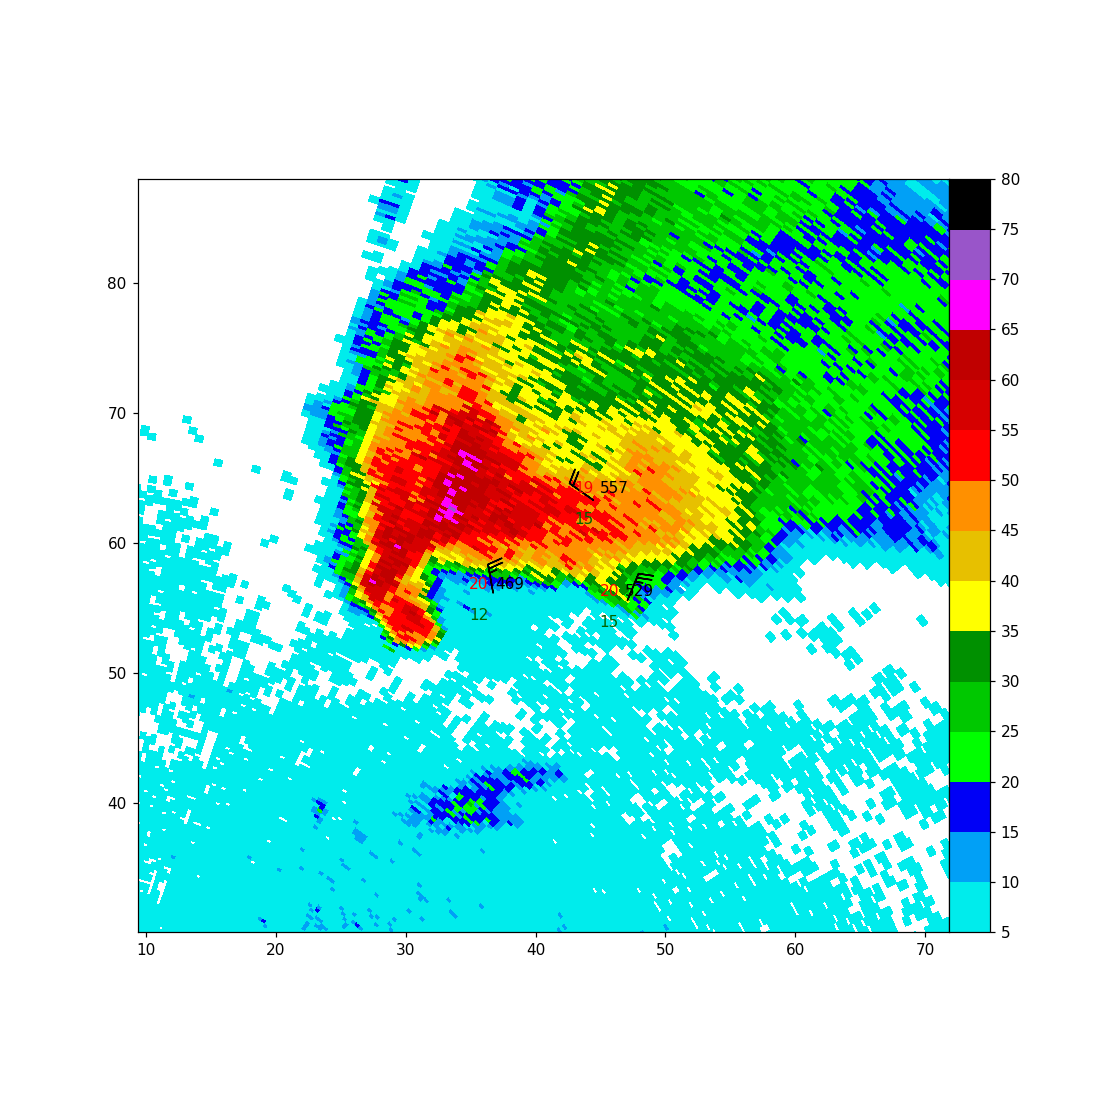

/Users/dawson29/anaconda2/lib/python2.7/site-packages/metpy/xarray.py:381: MetpyDeprecationWarning: The get_wind_components function was deprecated in version 0.9. This function has been renamed wind_components.
  return func(*args, **kwargs)
/Users/dawson29/anaconda2/lib/python2.7/site-packages/metpy/calc/basic.py:734: RuntimeWarning: All-NaN slice encountered
  if np.greater(np.nanmax(np.abs(value)), max_radians):


i, sweeptime =  2009-06-05 22:02:18


<IPython.core.display.Javascript object>


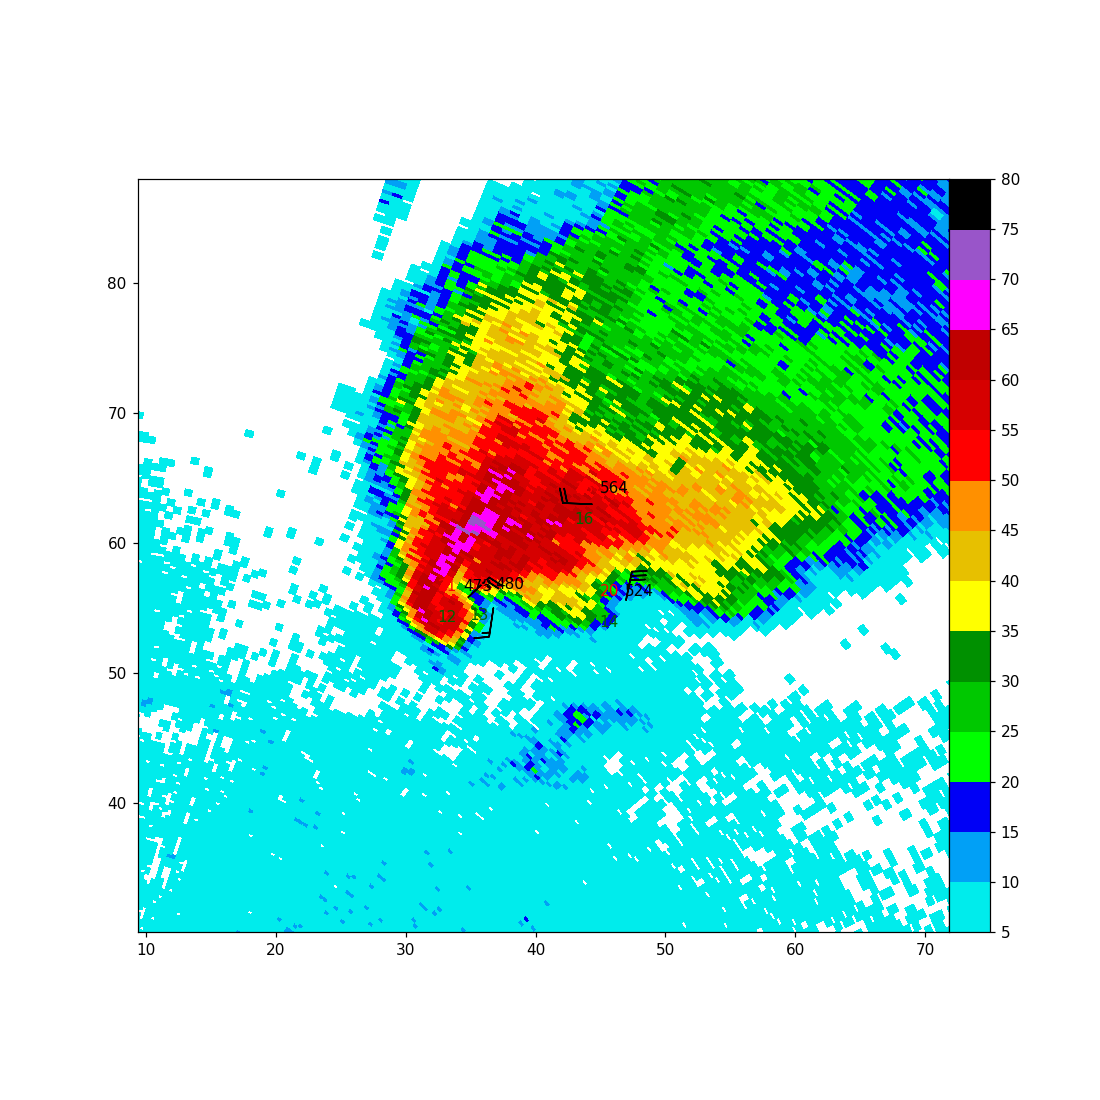

i, sweeptime =  2009-06-05 22:06:52


<IPython.core.display.Javascript object>


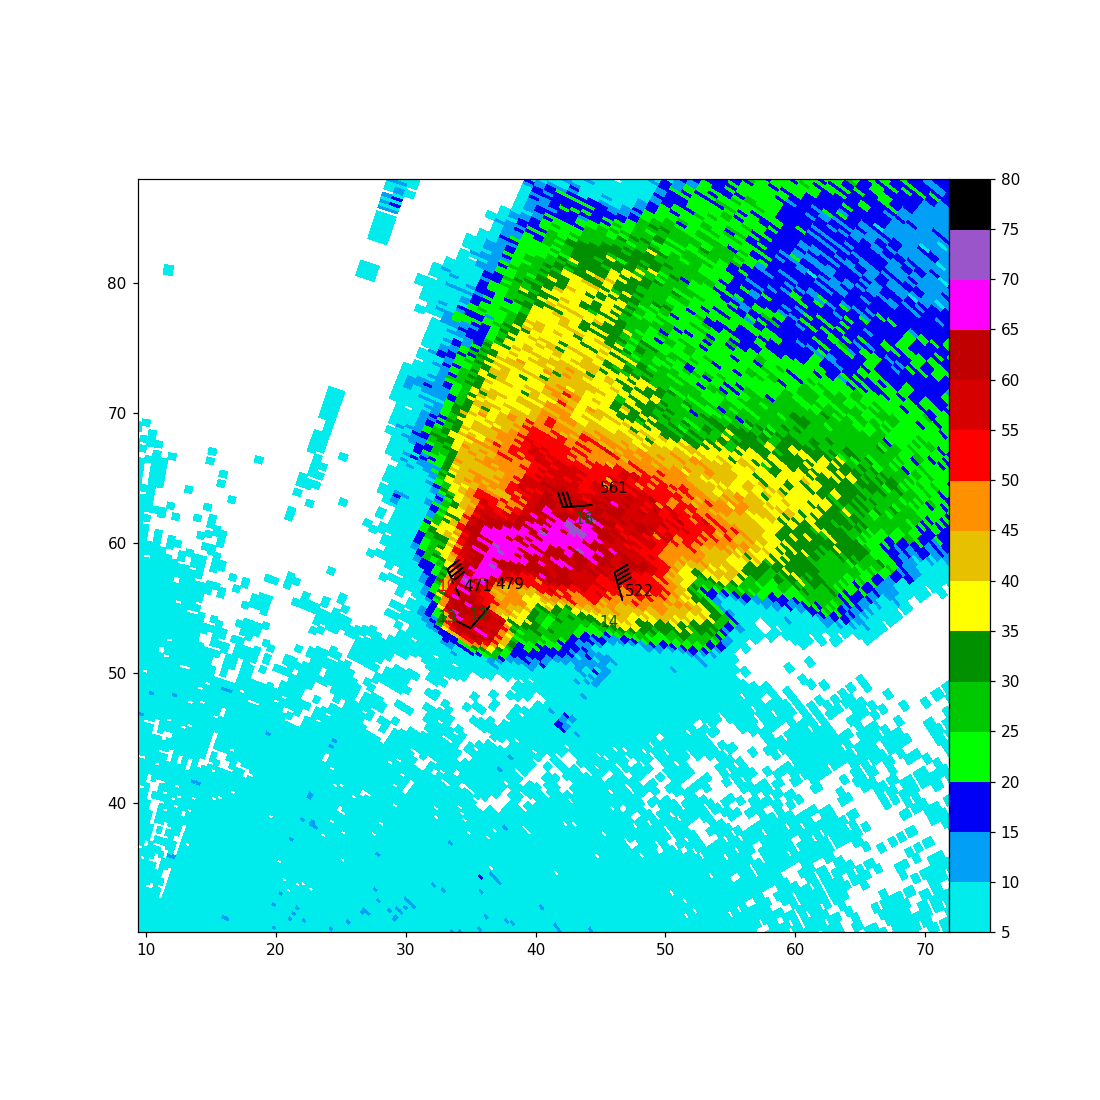

i, sweeptime =  2009-06-05 22:11:28


<IPython.core.display.Javascript object>


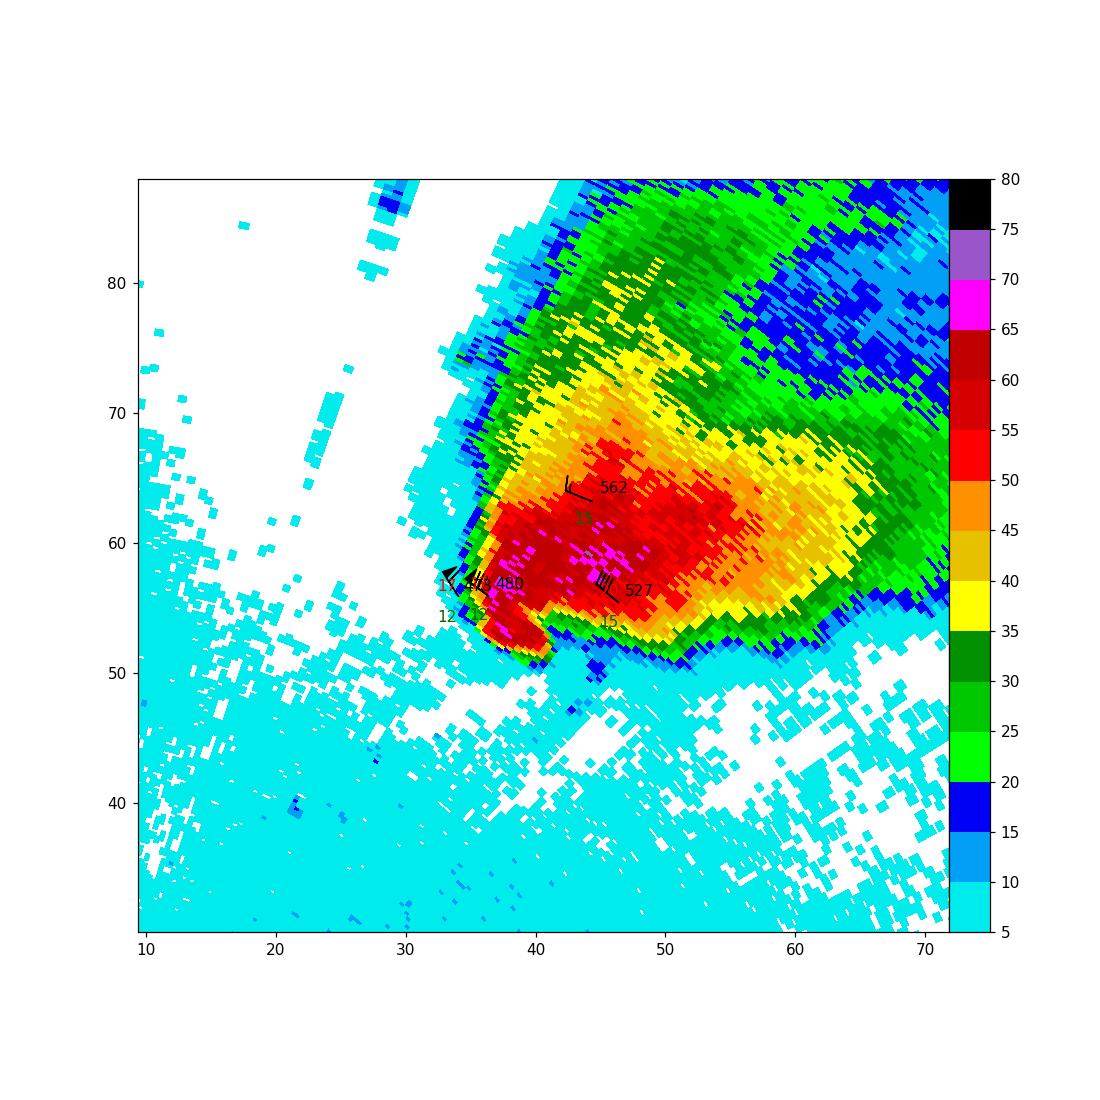

i, sweeptime =  2009-06-05 22:16:02


<IPython.core.display.Javascript object>


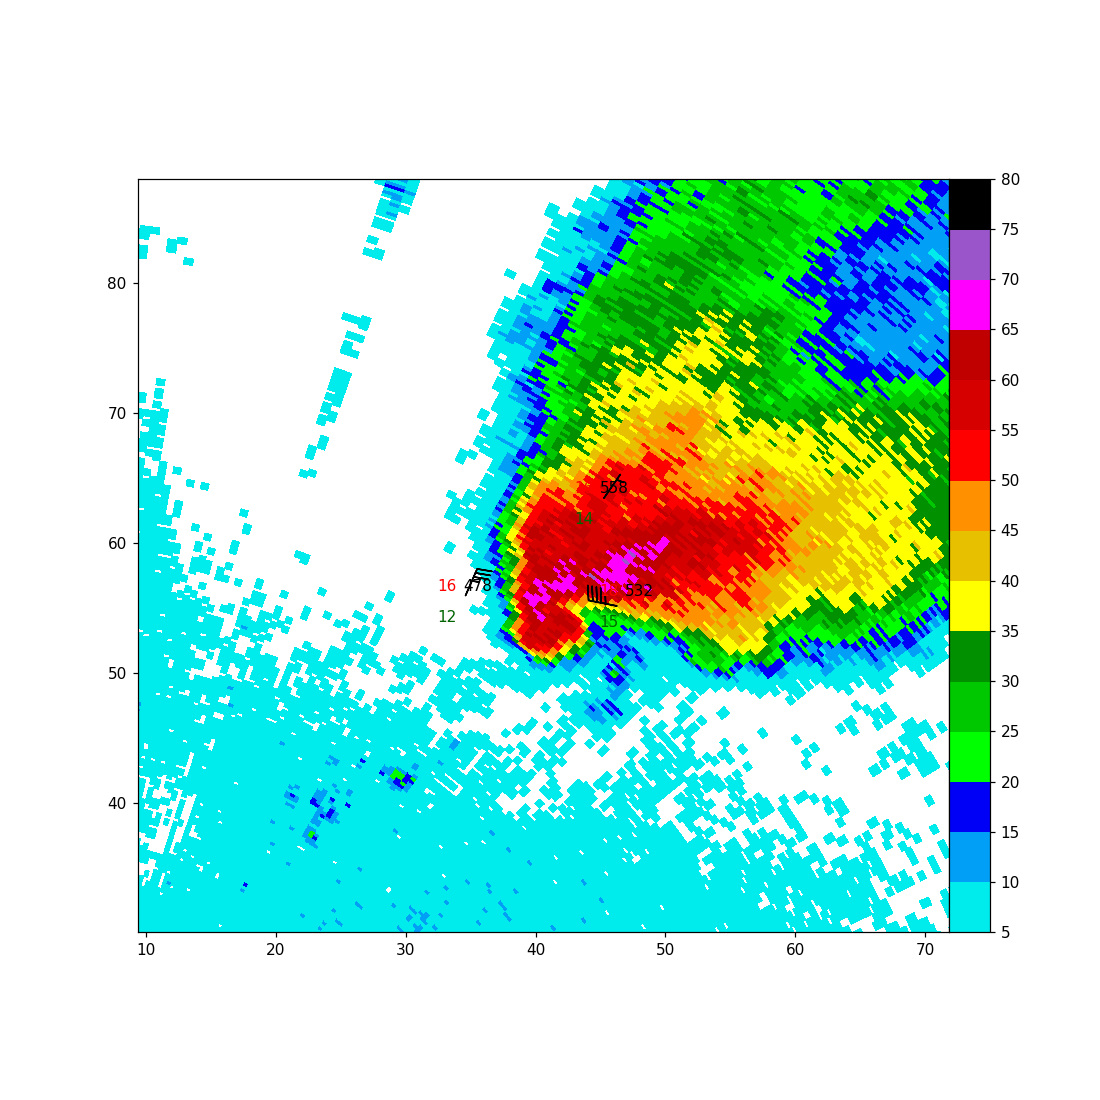

i, sweeptime =  2009-06-05 22:20:37


<IPython.core.display.Javascript object>


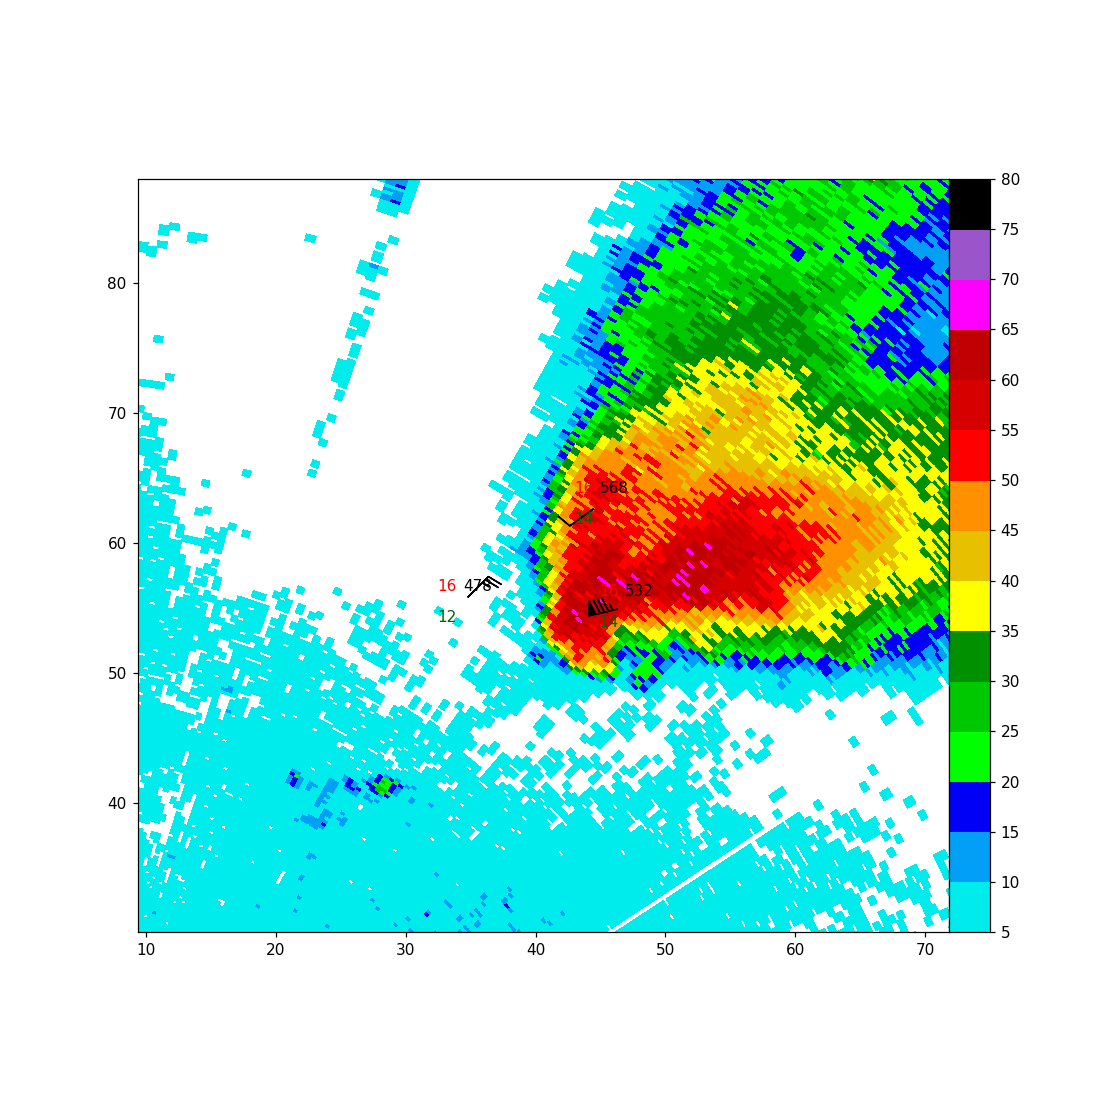

i, sweeptime =  2009-06-05 22:25:11


<IPython.core.display.Javascript object>


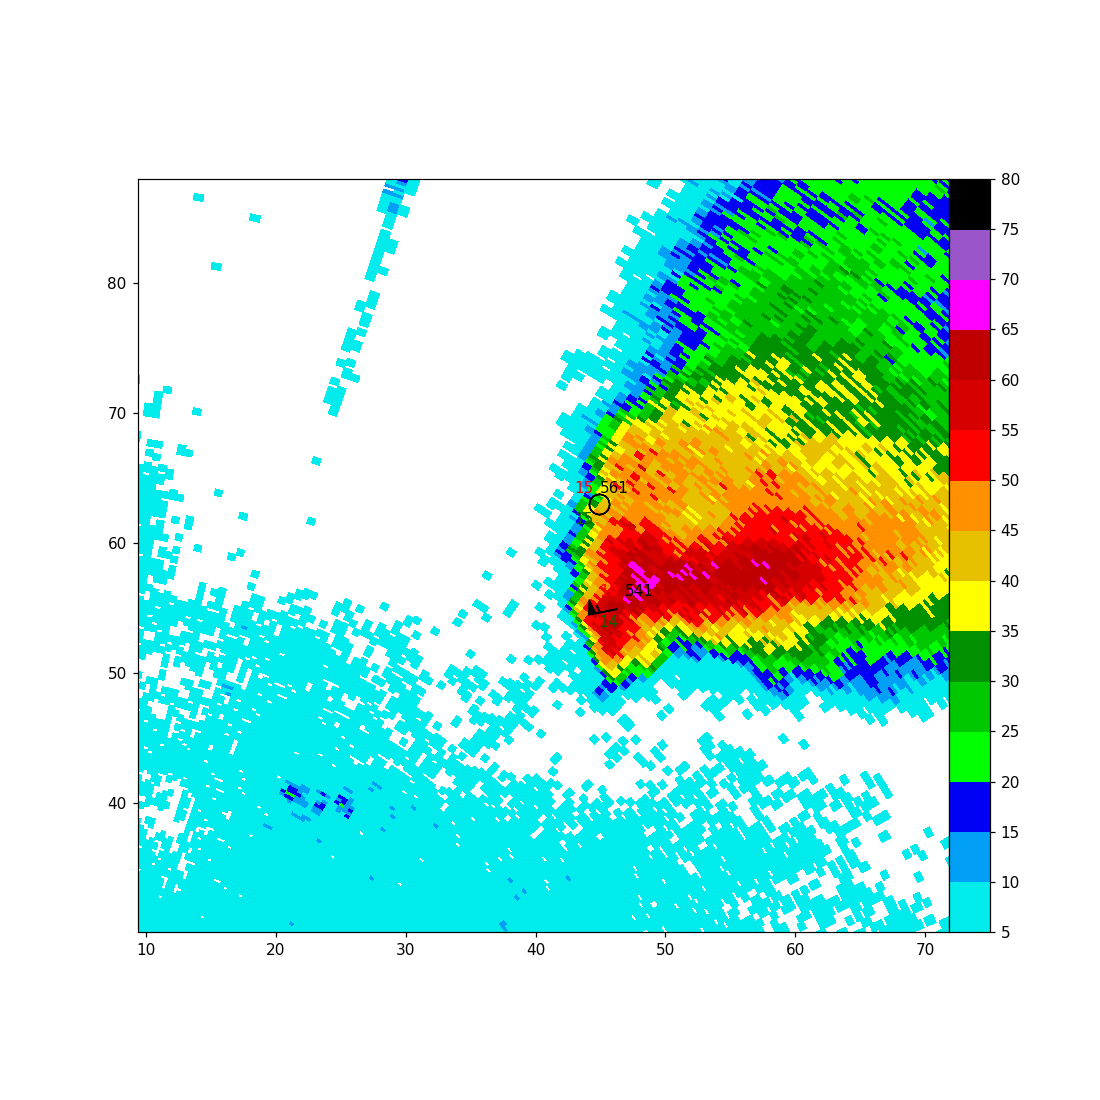

i, sweeptime =  2009-06-05 22:29:46


<IPython.core.display.Javascript object>


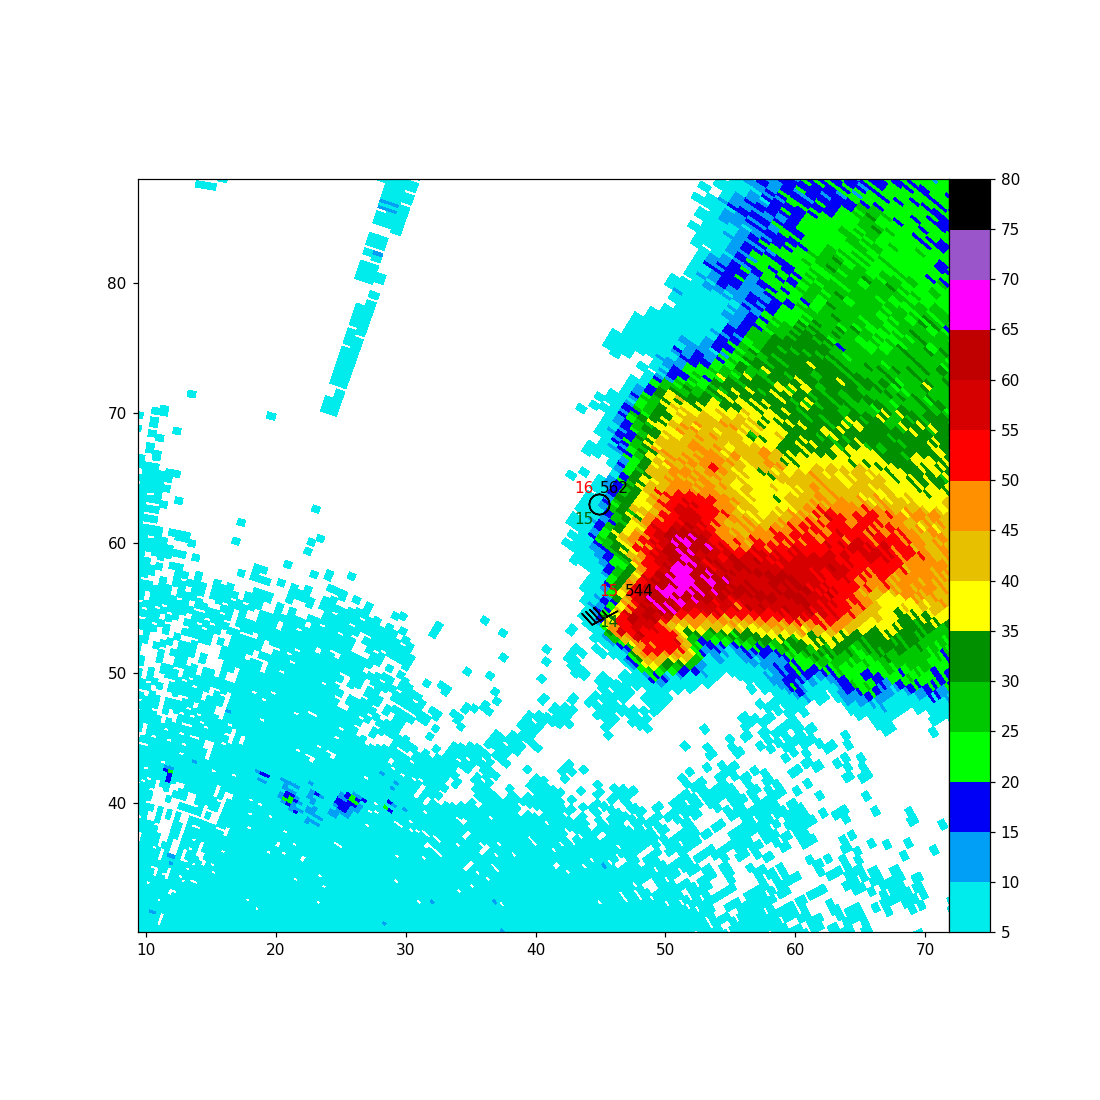

i, sweeptime =  2009-06-05 22:34:20


<IPython.core.display.Javascript object>


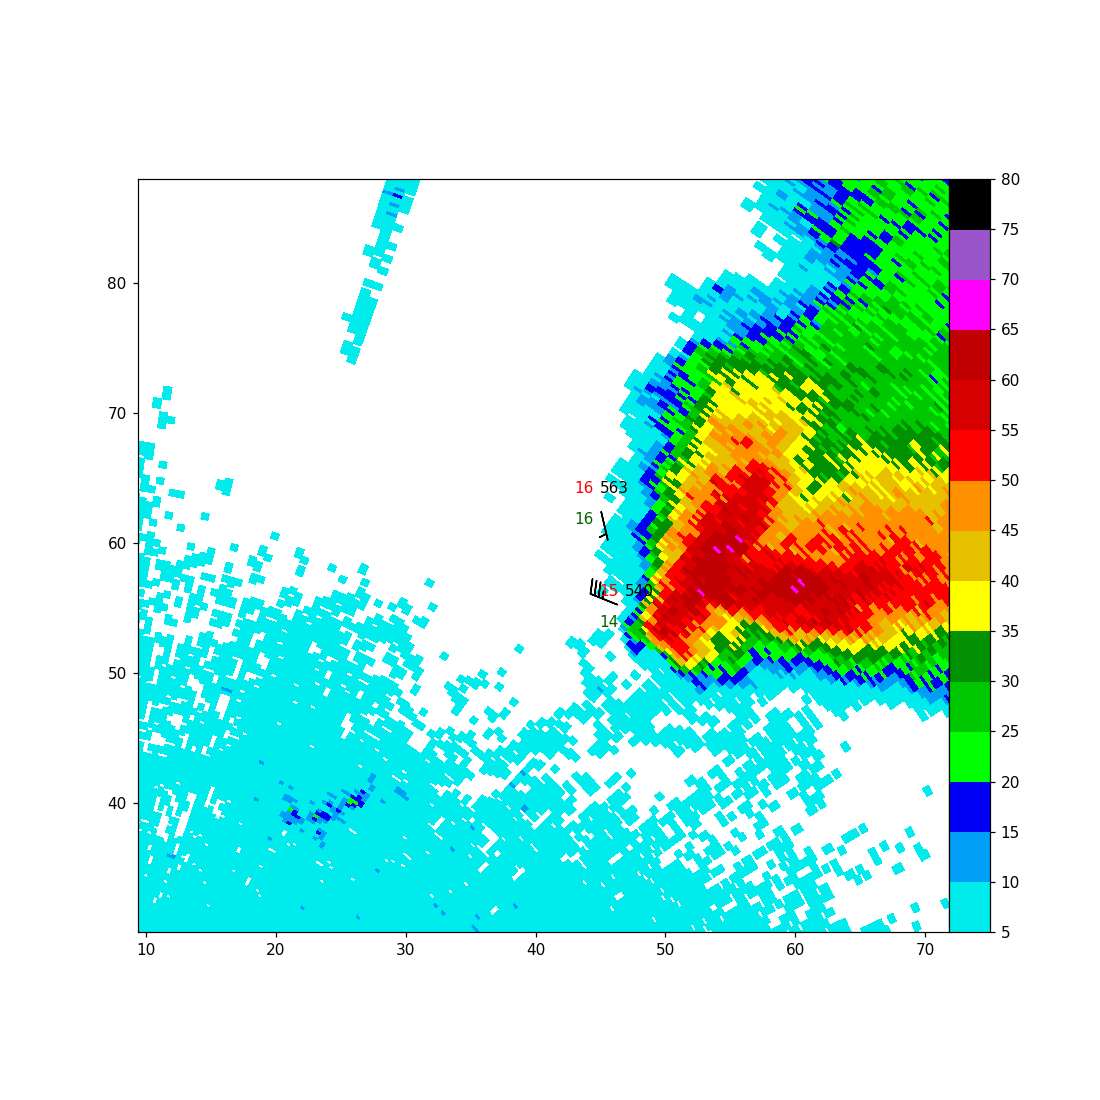

i, sweeptime =  2009-06-05 22:38:55


<IPython.core.display.Javascript object>


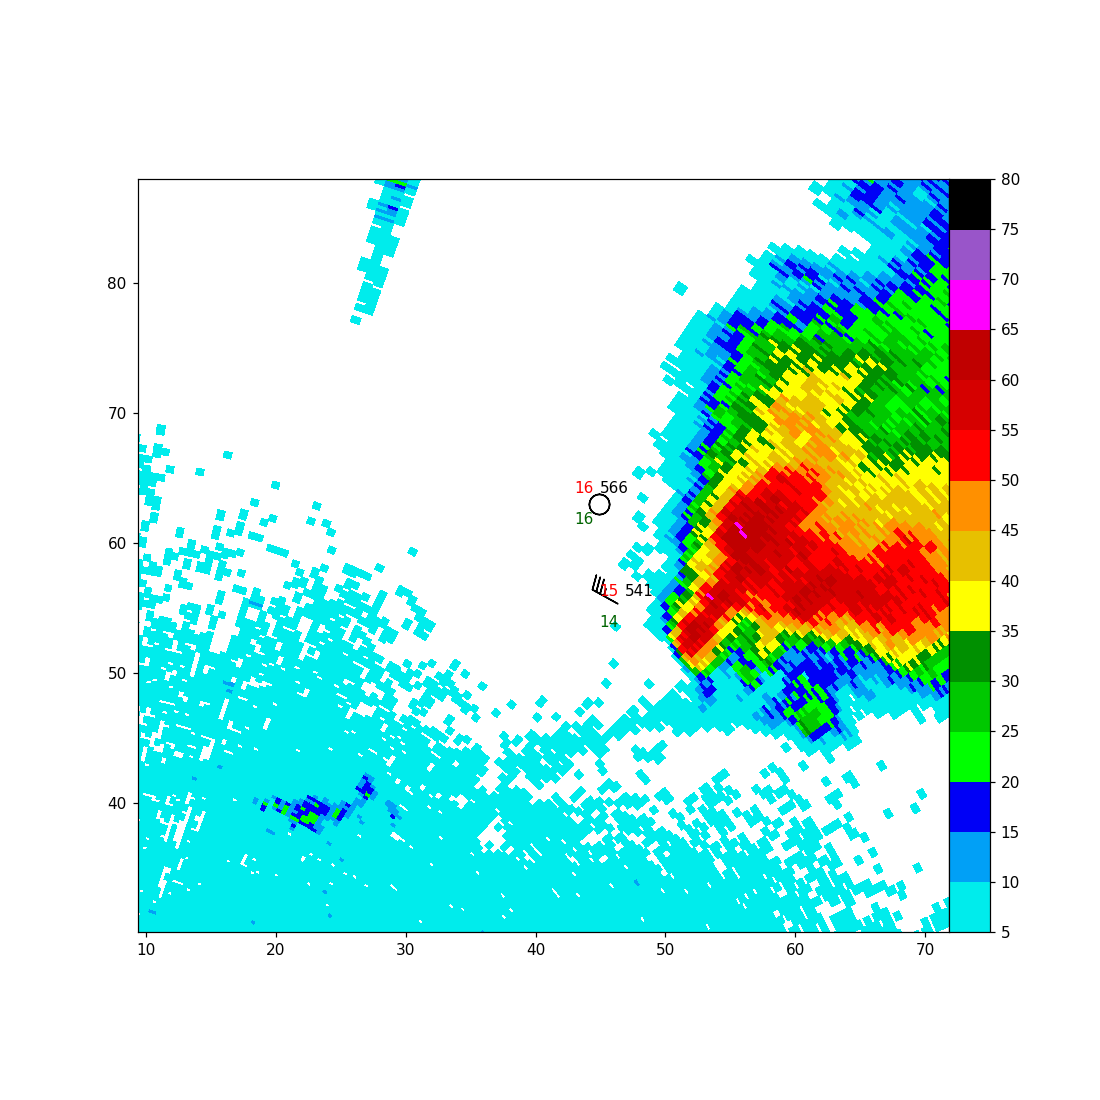

i, sweeptime =  2009-06-05 22:43:29


<IPython.core.display.Javascript object>


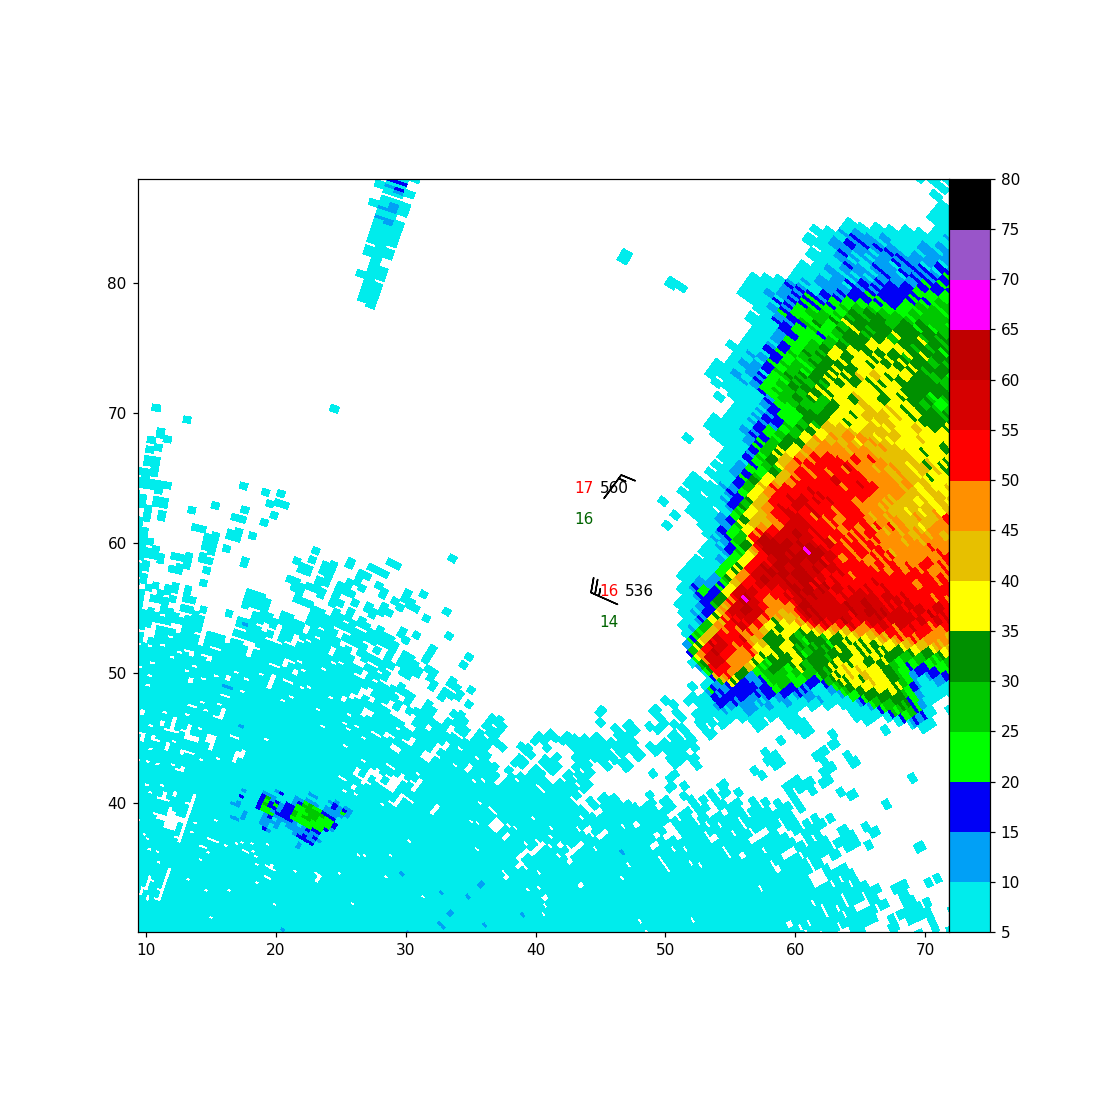

In [4]:
# Go ahead and read in the conventional data at the sweeptimes and plot them:
%matplotlib notebook
radlims = [0.0, 250000., 0., 360.]
plotlims = [-1, -1, -1, -1]
ovrmap = False
ovrdis = False
dis_name_list = None
dxy_list = None
fields_D_list = None
deg2rad = np.pi / 180.

# Read time series
dis_dict_at_radar = sim.read_convdata_at_sweeptimes(casedate, init_dis_dict, radar_dict)

# Find disdrometer lat/lons and convert them to cartesian coordinates relative to radar lat/lon

dis_dict = sim.get_dis_locs_relative_to_radar(casedate, init_dis_dict, radar_dict)

dxlist = [i[0] for i in dis_dict[casedate]['dradloclist']]
dylist = [i[1] for i in dis_dict[casedate]['dradloclist']]

# Set plotting limits to center on the disdrometer locations 
if plotlims[0] == -1:
    Dxmin = min(dxlist)
    Dxmax = max(dxlist)
    Dymin = min(dylist)
    Dymax = max(dylist)
    plotlims = [Dxmin - 25000., Dxmax + 25000., Dymin - 25000., Dymax + 25000.]

# Extract stuff from radar dictionary
sweeptimelist = radar_dict[casedate]['sweeptimelist']
radarsweeplist = radar_dict[casedate]['radarsweeplist']
outfieldnames = radar_dict[casedate]['outfieldnameslist'][0] # Just need first entry

# Extract stuff from disdrometer dictionary
templist = dis_dict_at_radar[casedate]['convdata_at_sweeptimes']['temp']
dewpointlist = dis_dict_at_radar[casedate]['convdata_at_sweeptimes']['dewpoint']
pressurelist = dis_dict_at_radar[casedate]['convdata_at_sweeptimes']['pressure']
windspdavgveclist = dis_dict_at_radar[casedate]['convdata_at_sweeptimes']['windspdavgvec']
winddiravgveclist = dis_dict_at_radar[casedate]['convdata_at_sweeptimes']['winddiravgvec']


for i, sweeptime in enumerate(sweeptimelist):
    print "i, sweeptime = ", sweeptime
    figlist, gridlist = radar.plotsweep_pyART(radlims, plotlims, outfieldnames, radarsweeplist[i], ovrmap, 
                                              ovrdis, dis_name_list, dxy_list, fields_D_list)
    ax = gridlist[0][0]
    
    for j, Dx, Dy in zip(xrange(len(dxlist)), dxlist, dylist):
        stationplot = StationPlot(ax, [Dx], [Dy])
        stationplot.plot_parameter('NW', [templist[j][i]], color='red')
        stationplot.plot_parameter('SW', [dewpointlist[j][i]], color='darkgreen')
        stationplot.plot_parameter('NE', [pressurelist[j][i]], formatter=lambda v: format(10 * v, '.0f')[-3:])
        u, v = get_wind_components([windspdavgveclist[j][i]] * units('m/s'), [winddiravgveclist[j][i]] * units.degree)
        stationplot.plot_barb(u, v, barb_increments=dict(half=0.5, full=1.0, flag=5.0))

    figlist[0].canvas.draw()
    figlist[0].set_size_inches(10., 10., forward = True)
    # if(field_D != None):
    #     ax.annotate(disfmtstr.format(field_D),(Dx+250.,Dy-250.),clip_on=True)
    #plt.savefig('/Users/ddawson/temp_VSE/fig{:04d}.png'.format(i),dpi=200)
    #plt.close(figlist[0])

[datetime.datetime(2009, 6, 5, 21, 57, 43), datetime.datetime(2009, 6, 5, 22, 2, 18), datetime.datetime(2009, 6, 5, 22, 6, 52), datetime.datetime(2009, 6, 5, 22, 11, 28), datetime.datetime(2009, 6, 5, 22, 16, 2), datetime.datetime(2009, 6, 5, 22, 20, 37), datetime.datetime(2009, 6, 5, 22, 25, 11), datetime.datetime(2009, 6, 5, 22, 29, 46), datetime.datetime(2009, 6, 5, 22, 34, 20), datetime.datetime(2009, 6, 5, 22, 38, 55), datetime.datetime(2009, 6, 5, 22, 43, 29)]
1
[ True  True  True  True  True  True  True  True  True  True  True]
[49651.056588494364, 46846.97792862546, 44053.095918428815, 41238.82060888766, 38444.93859869101, 35640.85993882211, 32846.97792862546, 30042.899268756562, 27249.017258559914, 24444.938598691013, 21651.056588494364]
[49651.056588494364, 46846.97792862546, 44053.095918428815, 41238.82060888766, 38444.93859869101, 35640.85993882211, 32846.97792862546, 30042.899268756562, 27249.017258559914, 24444.938598691013, 21651.056588494364]
[]


<IPython.core.display.Javascript object>


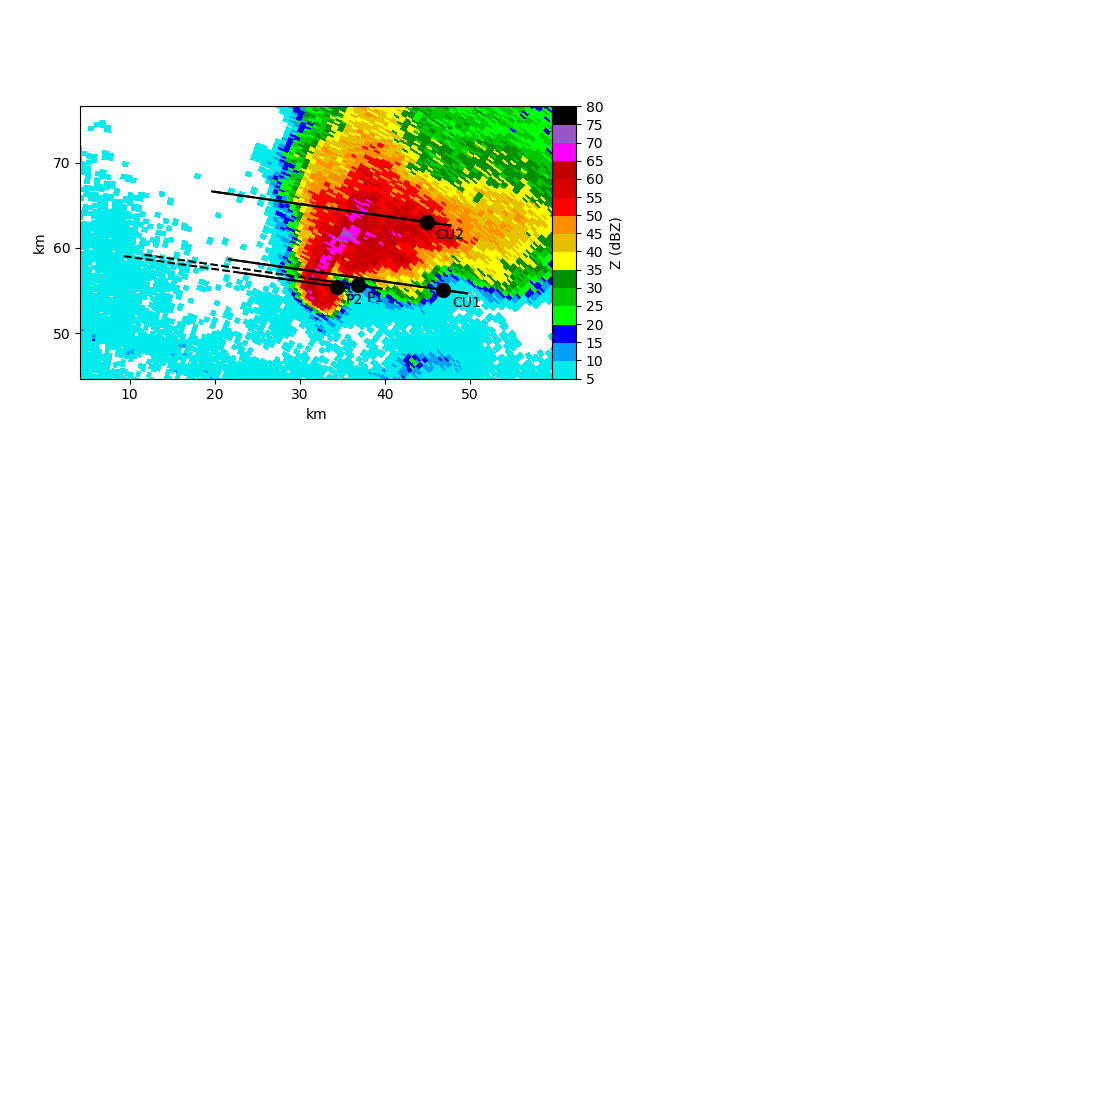

TypeError: join() got an unexpected keyword argument 'bbox_inches'

In [18]:
# Make a plot of the disdrometer transects through the storm, 
# choosing a representative sweeptime as the backdrop
plotdir = '/Users/dawson29/Projects/VORTEX2/model_DSD_study/pyPIPS_plots/'+casedate
sweeptimeref = radar_dict[casedate]['sweeptime_ref']
ustorm, vstorm = radar_dict[casedate]['feature_motion']
sweepindex = np.searchsorted(sweeptimelist, sweeptimeref)
sweepdtrel = [(sweeptime - sweeptimeref).total_seconds() for sweeptime in sweeptimelist]
deployed = dis_dict_at_radar[casedate]['convdata_at_sweeptimes']['deployed']
# dxsr = [[dx - ustorm * dt if d else np.nan for dt, d in zip(sweepdtrel, dp)] for dx, dp in zip(dxlist, deployed)]
# dysr = [[dy - vstorm * dt if d else np.nan for dt, d in zip(sweepdtrel, dp)] for dy, dp in zip(dylist, deployed)]
dxsr = [[dx - ustorm * dt for dt in sweepdtrel] for dx in dxlist]
dysr = [[dy - vstorm * dt for dt in sweepdtrel] for dy in dylist]

# Split up disdrometer storm relative locations by whether the disdrometer was actually deployed at a given time
dxsr_d = [[x for x, d in zip(dx, dp) if d] for dx, dp in zip(dxsr, deployed)]
dxsr_nd = [[x for x, d in zip(dx, dp) if not d] for dx, dp in zip(dxsr, deployed)]
dysr_d = [[y for y, d in zip(dy, dp) if d] for dy, dp in zip(dysr, deployed)]
dysr_nd = [[y for y, d in zip(dy, dp) if not d] for dy, dp in zip(dysr, deployed)]

print sweeptimelist
print sweepindex
print deployed[0]
print dxsr[0]
print dxsr_d[0]
print dxsr_nd[0]

# Set plotting limits to center on the disdrometer locations 
Dxmin = np.nanmin(np.array(dxsr))
Dxmax = np.nanmax(np.array(dxsr))
Dymin = np.nanmin(np.array(dysr))
Dymax = np.nanmax(np.array(dysr))
plotlims = [Dxmin - 5000., Dxmax + 10000., Dymin - 10000., Dymax + 10000.]
# plotlims = [15000., 45000., -15000., 0.]

figlist, gridlist = radar.plotsweep_pyART(radlims, plotlims, outfieldnames, radarsweeplist[sweepindex], ovrmap, 
                                              ovrdis, dis_name_list, dxy_list, fields_D_list)
ax = gridlist[0][0]

dis_names = dis_dict_at_radar[casedate]['dis_names']

for j, dx, dy, dx_d, dy_d, dx_nd, dy_nd, dp, dname in zip(xrange(len(dxlist)), dxsr, dysr, dxsr_d, dysr_d, 
                                                          dxsr_nd, dysr_nd, deployed, dis_names):
    ax.plot(dx_d, dy_d, ls='-', c='k')
    ax.plot(dx, dy, ls='--', c='k')
    if dp[sweepindex]:
        marker = 'o'
    else:
        marker = 'x'
    ax.plot(dx[sweepindex], dy[sweepindex], marker=marker, ms=10, c='k')
    ax.annotate(dname, (dx[sweepindex] + 1000., dy[sweepindex] - 2000.), clip_on=True)

gridlist[0].cbar_axes[0].set_ylabel('Z (dBZ)')
ax.set_xlabel('km')
ax.set_ylabel('km')
    
figlist[0].canvas.draw()
figlist[0].set_size_inches(10., 10., forward = True)

figpath = os.path.join(plotdir, casedate+'_transects_radar.eps', bbox_inches='tight')
plt.savefig(figpath, dpi=300)

Starting and ending grid coordinates are:
             igbgn = 0, igend = 100, jgbgn = 0, jgend = 100
[0.0 100.0 207.4962615966797 323.05072021484375 447.2674255371094
 580.7957153320312 724.3336791992188 878.6315307617188 1044.4959716796875
 1222.7940673828125 1414.4578857421875 1620.4892578125 1841.96533203125
 2080.043701171875 2335.968994140625 2611.079345703125 2906.8125
 3224.714599609375 3566.447509765625 3933.79736328125 4328.68505859375
 4753.17431640625 5209.484375 5700.00048828125 6200.00048828125
 6700.00048828125 7200.00048828125 7700.00048828125 8200.0009765625
 8700.0009765625 9200.0009765625 9700.0009765625 10200.0009765625
 10700.0009765625 11200.0009765625 11700.0009765625 12200.0009765625
 12700.0009765625 13200.0009765625 13700.0009765625 14200.0009765625
 14700.0009765625 15200.0009765625 15700.0009765625 16200.0009765625
 16700.0 17200.0 17700.0 18200.0 18700.0 19200.0 19700.0 20200.0 20700.0
 21200.0 21700.0 22200.0 22700.0 23200.0 23700.0 24200.0] [0.0 103.74813

<IPython.core.display.Javascript object>


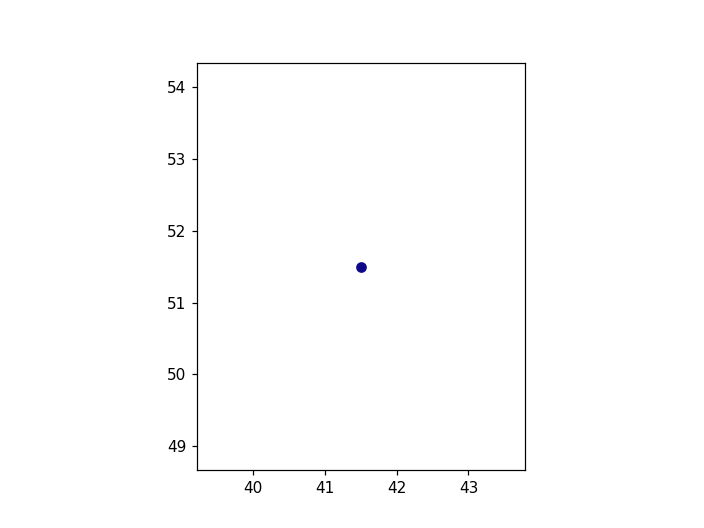

The model time is 10440 s
Deriving variable vortz
(26, 26)
max vortz at height z = 0.0 m
is 0.03
The location is x,y = 41.50,51.50 (i,j = 41,51)
[11, 72, 21, 82, 0, 1]
[11, 73, 21, 83, 0, 1]
Reading microphysics information for ZVDH scheme.
Rain is gamma-diameter.
Found ZR array! Computed shape parameter for rain.
Did not find ZS array! Assuming 2-moment with constant shape parameter.
Found ZG array! Computed shape parameter for grpl.
Found ZH array! Computed shape parameter for hail.
['rhoscst', 'zh', 'zg', 'rhorcst', 'zr', 'zs', 'rhogcst', 'qgw', 'tair', 'rhohcst', 'qhw', 'rhos', 'rhor', 'nts', 'ntr', 'nth', 'rhoh', 'qsw', 'rhoa', 'rhog', 'ntg', 'alphar', 'alphas', 'qs', 'qr', 'alphag', 'qg', 'qh', 'alphah']
['rhoscst', 'zh', 'zg', 'rhorcst', 'qh', 'nth', 'zr', 'zs', 'rhogcst', 'qgw', 'PTE', 'tair', 'rhohcst', 'TH', 'VC', 'qhw', 'rhos', 'rhor', 'nts', 'ntr', 'P', 'rhoh', 'U', 'V', 'rhoa', 'rhog', 'ntg', 'alphar', 'alphas', 'qs', 'qr', 'QV', 'DBZ', 'alphag', 'qg', 'qsw', 'alphah', 'UC

In [6]:
# Set up stuff for time composites
# Initial grid limits (m)
gridlims = [0., 100000., 0., 100000.]

# Width of composite box in m
compositewidthx = 60000.
compositewidthy = 60000.

# Width of search box for extremum in m
searchboxwidthx = 12000.
searchboxwidthy = 12000.

# Name of variable for whose extrema to track for compositing (that's an awkward phrasing)
tracking_varname = 'vortz'
# level (height in m) at which to track the extrema
tracking_level = 0.0 # 0.0 for 5 June, 3000.0 for 7 June, 3000.0 for 9 June 
# Type of extremum (max or min)
tracking_extremum = 'max'
# Threshold magnitude of extremum below which to throw out a time from the composite
tracking_thresh = 0.01

compositedict = {'gridlims': gridlims,
                 'compositewidth': (compositewidthx, compositewidthy), 
                 'searchboxwidth': (searchboxwidthx, searchboxwidthy),
                 'tracking_varname': tracking_varname,
                 'tracking_extremum': tracking_extremum, 
                 'tracking_level': tracking_level, 
                 'tracking_thresh': tracking_thresh}

# Read in the model information for the case we want
model_dict = sim.set_dh(casedate, init_model_dict, radar_dict)
dh = model_dict[casedate]['DataHandler']
modeltime_ref = model_dict[casedate]['modeltime_ref']

# Read in the model grid info
grid_dict = sim.read_model_grid(dh)
# Initialize composite parameters
if model_dict[casedate]['composite']:
    compositedict = sim.init_composite(compositedict, grid_dict)

# dp_data, consts = dh.loadMicrophysics()
# # Extract the lowest model level and store in dp_data_2D
# dp_data_2D = {}
# for key, dat in dp_data.iteritems():
#     dp_data_2D[key] = dat[:,:,0]
# dp_data_plot = {}
# for key, dat in dp_data_2D.iteritems():
#     dp_data_plot[key] = dat.swapaxes(0, 1).squeeze()
# dp_data_plot_list.append(dp_data_plot)

if model_dict[casedate]['composite']:
    print "Building composite!"
    varcompdict = sim.build_composite(casedate, model_dict, compositedict, dh)
    Zmod = varcompdict['DBZ']
    Zmodplot = Zmod
else:    
    Zmod = dh.loadModelReflectivity()
    Zmodplot = Zmod[:, :, 0].T
# Zmodplot_list.append(Zmodplot)

<IPython.core.display.Javascript object>


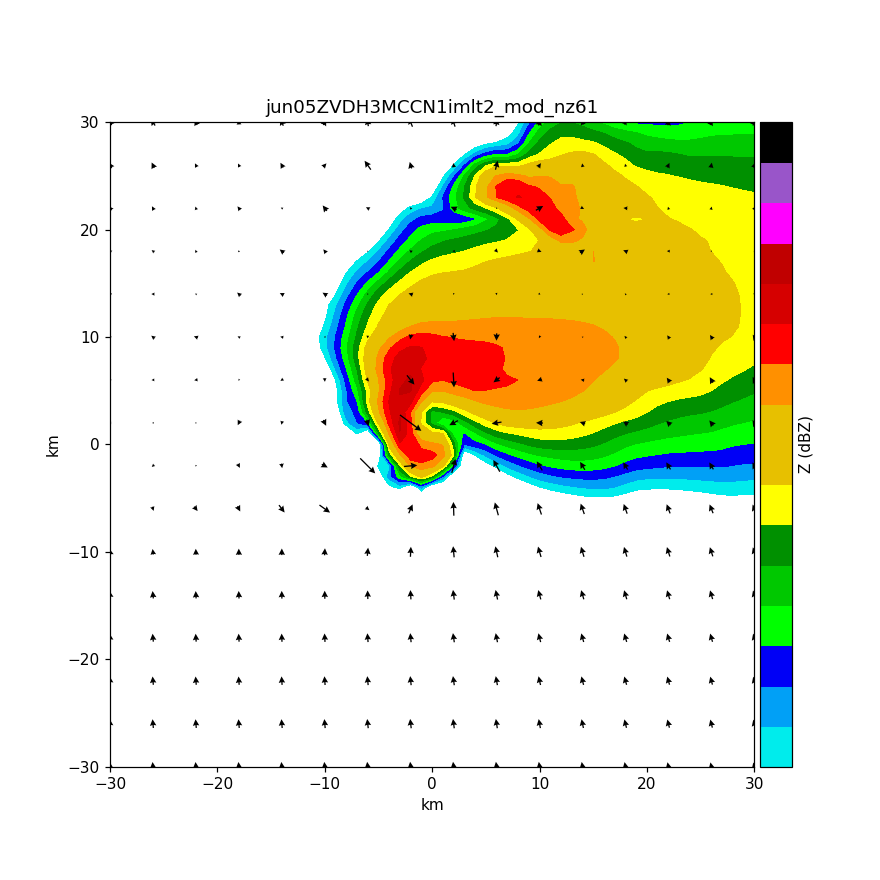

In [7]:
# Quick plot of the reflectivity composite for testing
runname = model_dict[casedate]['runname']
model_times = model_dict[casedate]['model_times']
xckm_comp, yckm_comp = compositedict['ccoords']
uccomp = varcompdict['UC']
vccomp = varcompdict['VC']
wind_pltscale = 2.0 # Scale of wind vectors
windintv = 4        # Interval in grid points to plot wind vectors

clevels = np.arange(0., 85., 5.)
cintv = clevels[1] - clevels[0]
norm, cmap = ctables.registry.get_with_steps('NWSReflectivity', 5., 5.)
cbarlevels = ticker.MultipleLocator(base=cintv)
clabel = 'Z (dBZ)'
# qrplot = varcompdict['qg']*1000.
# clevels = np.arange(0., 5.05, 0.05)
# cintv = clevels[1] - clevels[0]
# norm = None
# cmap = cm.Blues
# cbarlevels = np.arange(0., 5.5, 0.5) # ticker.MultipleLocator(base=1.0)
# clabel = 'qg (g/kg)'

compfig = plt.figure(figsize=(8,8))
compax = compfig.add_subplot(111)
plt.title(model_dict[casedate]['runname'])
dBZplt = compax.contourf(xckm_comp, yckm_comp, Zmodplot, levels=clevels, cmap=cmap)
# compax.contour(xskm_comp,yskm_comp,dBZ.T,levels=np.arange(30.,90.,10.),colors='k')
windplt = compax.quiver(xckm_comp[::windintv], yckm_comp[::windintv], uccomp[::windintv, ::windintv],
    vccomp[::windintv, ::windintv], pivot='middle', units='width', scale_units='width', 
    scale=1200.0/float(wind_pltscale), width=0.001*float(wind_pltscale), headwidth=5, headlength=5, color='k')

compax.set_aspect('equal')
divider = make_axes_locatable(compax)
cax = divider.append_axes("right", size="5%", pad = 0.05)
clabels = cbarlevels
clvllocator = ticker.FixedLocator(clabels)
plt.colorbar(dBZplt, ticks=clvllocator, cax=cax)
cax.set_ylabel('Z (dBZ)')
#cax.set_ylabel('qg (g/kg)')

compax.set_xlabel('km')
compax.set_ylabel('km')

compfig.savefig(runname+'_dBZ_comp_{:06d}_{:06d}.pdf'.format(int(model_times[0]),int(model_times[-1])),dpi=200)

<IPython.core.display.Javascript object>


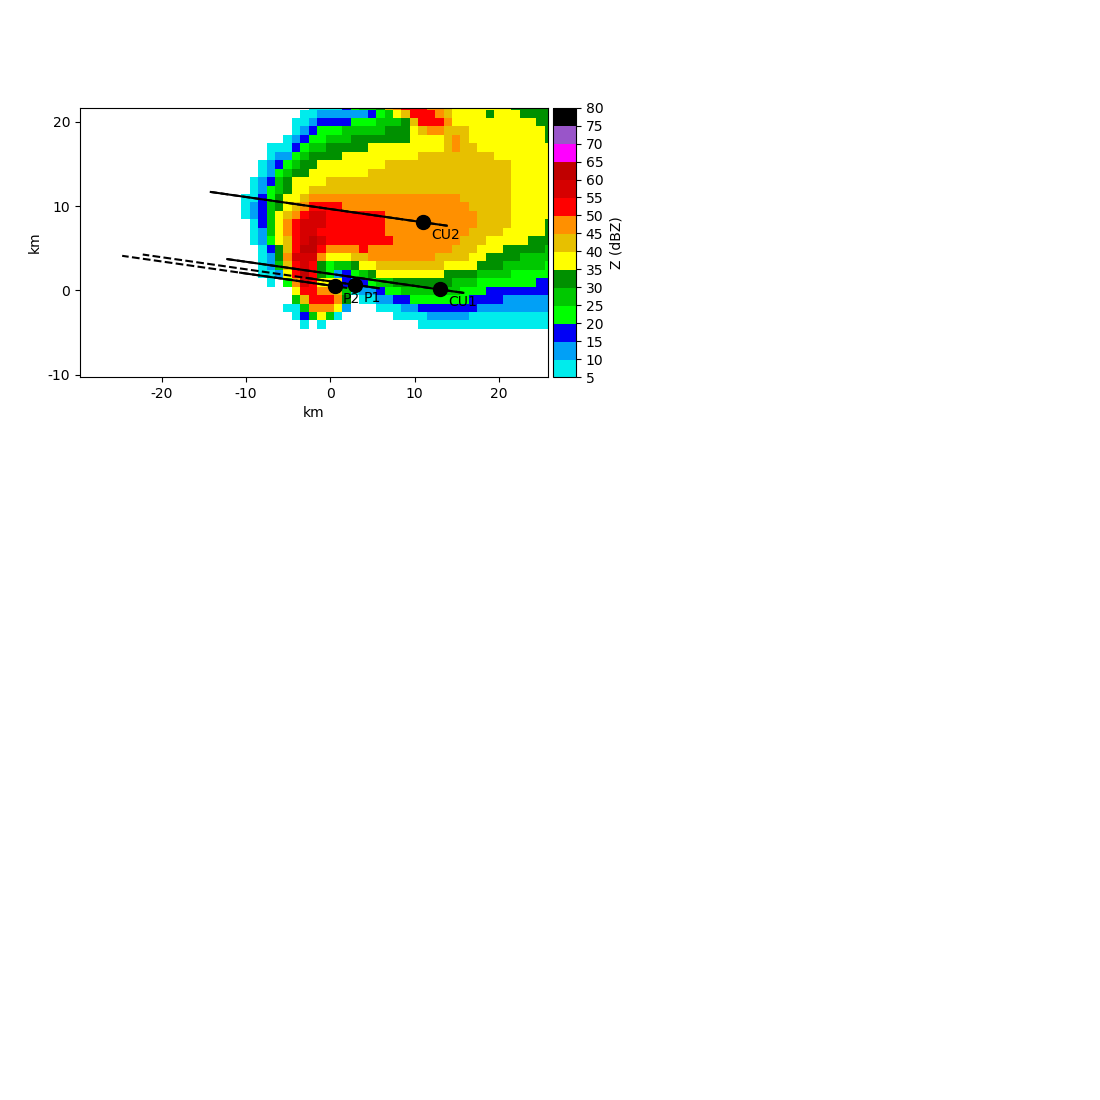

[-29695.9213401311, 25775.607369744364] [-10291.015904083371, 21674.294729292433]
10000.0 10000.0


TypeError: join() got an unexpected keyword argument 'bbox_inches'

In [17]:
# Make a plot of the disdrometer transects through the *simulated* storm, 
# choosing a representative *model time* as the backdrop

# First we need to set up a list of x and y coordinates within the model for each disdrometer. We'll use the
# coordinates computed relative to the radar above, but shifted so that they are in the same relative position
# to the model storm (necessarily subjective) as they are for the observed storm.
# For example, we'll use P2's coordinates near the tip of the hook for 5 June 2009.

if model_dict[casedate]['composite']:
    xref_model, yref_model = model_dict[casedate]['ref_coords_comp']
    # Some coordinate array shenanigans
    composite_grid_dict = sim.get_composite_grid(grid_dict, compositedict)
    xcplot = composite_grid_dict['xcplot']
    ycplot = composite_grid_dict['ycplot']
    xeplot = composite_grid_dict['xeplot']
    yeplot = composite_grid_dict['yeplot']
    xcorplot = composite_grid_dict['xcorplot']
    ycorplot = composite_grid_dict['ycorplot']
else:
    xref_model, yref_model = model_dict[casedate]['ref_coords']
    xcplot = grid_dict['xcplot']
    ycplot = grid_dict['ycplot']
    xeplot = grid_dict['xeplot']
    yeplot = grid_dict['yeplot']
    xcorplot = grid_dict['xcorplot']
    ycorplot = grid_dict['ycorplot']

xref_rad = dxlist[-1]
yref_rad = dylist[-1]

xshift = xref_model - xref_rad
yshift = yref_model - yref_rad

dxmodlist = [dx + xshift for dx in dxlist]
dymodlist = [dy + yshift for dy in dylist]

# Using sweeptimelist here to facilitate matching with the disdrometer locations on the radar plot.
sweepdtrel = [(sweeptime - modeltime_ref).total_seconds() for sweeptime in sweeptimelist]
dxsrm = [[dx - ustorm * dt for dt in sweepdtrel] for dx in dxmodlist]
dysrm = [[dy - vstorm * dt for dt in sweepdtrel] for dy in dymodlist]

# Split up disdrometer storm relative locations by whether the disdrometer was actually deployed at a given time
dxsrm_d = [[x for x, d in zip(dx, dp) if d] for dx, dp in zip(dxsrm, deployed)]
dxsrm_nd = [[x for x, d in zip(dx, dp) if not d] for dx, dp in zip(dxsrm, deployed)]
dysrm_d = [[y for y, d in zip(dy, dp) if d] for dy, dp in zip(dysrm, deployed)]
dysrm_nd = [[y for y, d in zip(dy, dp) if not d] for dy, dp in zip(dysrm, deployed)]

# Get the index where the relative time is zero. Use this below to put the probes
# at the proper location along the transect corresponding to the reference time.
modelindex_ref = np.searchsorted(sweepdtrel, 0.)

# Set plotting limits to center on the disdrometer locations 
Dxmin = np.array(dxsrm).min()
Dxmax = np.array(dxsrm).max()
Dymin = np.array(dysrm).min()
Dymax = np.array(dysrm).max()
plotlims = [Dxmin - 5000., Dxmax + 10000., Dymin - 10000., Dymax + 10000.]

fig = None
ax = None
ptype = 2
xlim = [plotlims[0], plotlims[1]]
ylim = [plotlims[2], plotlims[3]]
clevels = np.arange(0., 85., 5.)
cintv = clevels[1] - clevels[0]
norm, cmap = ctables.registry.get_with_steps('NWSReflectivity', 5., 5.)
cbarlevels = ticker.MultipleLocator(base=cintv)
clabel = 'Z (dBZ)'
cformat = None
ovrmap = False
gis_info = None
numovr = 0
axesticks = [10000., 10000.]

fig, ax = pm.plotsingle(fig, ax, ptype, xcplot, ycplot, xcorplot, ycorplot, xlim, ylim, Zmodplot, clevels, cmap, norm,
                            cbarlevels, clabel, cformat, ovrmap, gis_info, numovr, None, None, None, None, None,
                            axesticks)

for j, dx, dy, dx_d, dy_d, dx_nd, dy_nd, dp, dname in zip(xrange(len(dxmodlist)), dxsrm, dysrm, dxsrm_d, dysrm_d, 
                                                          dxsrm_nd, dysrm_nd, deployed, dis_names):
    ax.plot(dx, dy, ls='--', c='k')
    ax.plot(dx_d, dy_d, ls='-', c='k')
    if dp[modelindex_ref]:
        marker = 'o'
    else:
        marker = 'x'
    ax.plot(dx[sweepindex], dy[sweepindex], marker=marker, ms=10, c='k')
    ax.annotate(dname, (dx[sweepindex] + 1000., dy[sweepindex] - 2000.), clip_on=True)
    
fig.canvas.draw()
fig.set_size_inches(10., 10., forward = True)
figpath = os.path.join(plotdir, casedate+'_transects_model.eps', bbox_inches='tight')
plt.savefig(figpath, dpi=300)

In [9]:
# Read in time series and add to dis_dict
dis_dict = sim.read_probe_time_series(casedate, dis_dict, radar_dict)


Severe Wind contamination, masking entire PSD!
Severe Wind contamination, masking entire PSD!
Severe Wind contamination, masking entire PSD!
Severe Wind contamination, masking entire PSD!
Severe Wind contamination, masking entire PSD!
Severe Wind contamination, masking entire PSD!
Severe Wind contamination, masking entire PSD!
Severe Wind contamination, masking entire PSD!
Requested DSD interval: 60.0. Actual DSD interval: 60.0
Severe Wind contamination, masking entire PSD!
Severe Wind contamination, masking entire PSD!
Requested DSD interval: 60.0. Actual DSD interval: 60.0
Requested DSD interval: 60.0. Actual DSD interval: 60.0
Requested DSD interval: 60.0. Actual DSD interval: 60.0


In [10]:
if not model_dict[casedate]['composite']:
    varlists = ['DBZ', 'TH', 'QV', 'P']
    varlistv = ['U', 'V']
    varlist_derived = ['PTE', 'UC', 'VC']

    vardictlist = sim.read_vardict(casedate, model_dict, varlists, varlistv, varlist_derived)

    vardict = vardictlist[0]
    grid_dict_in = grid_dict
else:
    vardict = varcompdict
    grid_dict_in = composite_grid_dict

# Find grid intersections
dis_ts_model_dict = sim.find_transect_grid_intersections(casedate, grid_dict_in, dis_dict, model_dict, radar_dict, 
                                     vardict, plot_locations=False, debug=False)

In [11]:
print dis_dict[casedate].keys()
print dis_ts_model_dict.keys()
print varcompdict['rhoa']
dis_ts_vars_points = dis_ts_model_dict['dis_ts_vars_points']
print len(dis_ts_vars_points)
dis_names = dis_dict[casedate]['dis_names']
print len(dis_names)

['dis_names', 'dradloclist', 'starttimes', 'timeseries', 'dis_dir', 'convdata_at_sweeptimes', 'stoptimes', 'dis_types', 'disfilenames', 'dgeoloclist', 'convfilenames']
['dis_ts_stimes', 'dis_ts_vars', 'dis_ts_vars_points', 'dis_ts_ijlocs', 'dis_ts_times', 'dis_ts_xyslocs', 'dis_ts_tlocs', 'dis_ts_xylocs']
[[0.96490175 0.96491158 0.96491551 ... 0.96478105 0.96477735 0.96477616]
 [0.96490765 0.96491772 0.96492231 ... 0.96478355 0.96477956 0.96477848]
 [0.96491289 0.96492326 0.96492869 ... 0.96478611 0.96478158 0.96478045]
 ...
 [0.97004634 0.97031391 0.97041494 ... 0.96615779 0.9660905  0.9660334 ]
 [0.96969444 0.97001624 0.97020429 ... 0.96609765 0.96603245 0.96599305]
 [0.96905905 0.96944672 0.97004545 ... 0.96601254 0.96596277 0.96593344]]
4
4


In [12]:
print dis_dict[casedate]['timeseries'].keys()

['pressure', 'intensity', 'rho', 'dewpoint', 'temp', 'winddiravgvec', 'pcount', 'windspdavgvec', 'ND', 'times']


/Users/dawson29/anaconda2/lib/python2.7/site-packages/numpy/ma/core.py:2784: UserWarning: Warning: converting a masked element to nan.
  order=order, subok=True, ndmin=ndmin)
/Users/dawson29/pyPIPS/modules/disdrometer_module.py:2049: UserWarning: Warning: converting a masked element to nan.
  rainrate = np.array(rainrate)
/Users/dawson29/pyPIPS/modules/disdrometer_module.py:2113: RuntimeWarning: divide by zero encountered in log10
  refl_disd = 10.0 * np.log10(1e18 * M6)
/Users/dawson29/pyPIPS/modules/disdrometer_module.py:2242: UserWarning: Warning: converting a masked element to nan.
  mu_tmf = np.array(mu_tmf)
/Users/dawson29/pyPIPS/modules/disdrometer_module.py:2243: UserWarning: Warning: converting a masked element to nan.
  lamda_tmf = np.array(lamda_tmf)
/Users/dawson29/pyPIPS/modules/disdrometer_module.py:2282: RuntimeWarning: divide by zero encountered in divide
  D_med_exp = np.where(lamda_exp == 0., np.nan, (3.67 / lamda_exp) * 1000.0)
/Users/dawson29/pyPIPS/modules/disdrome

<IPython.core.display.Javascript object>


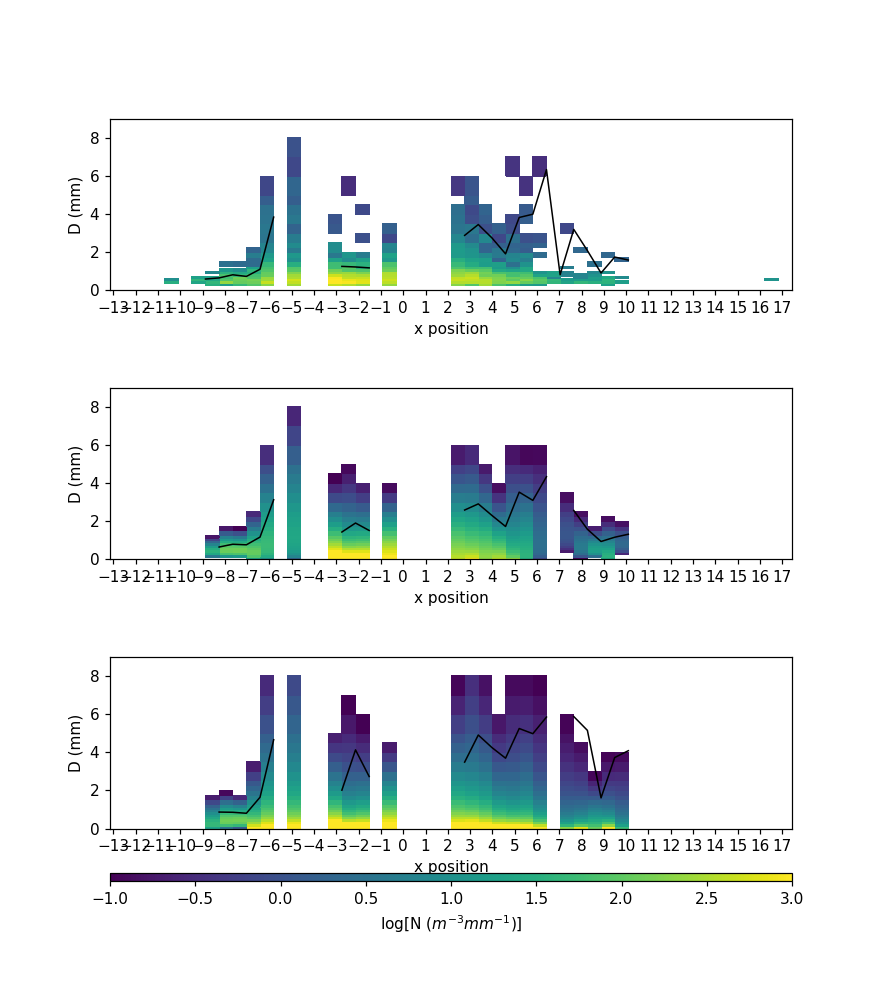

<IPython.core.display.Javascript object>


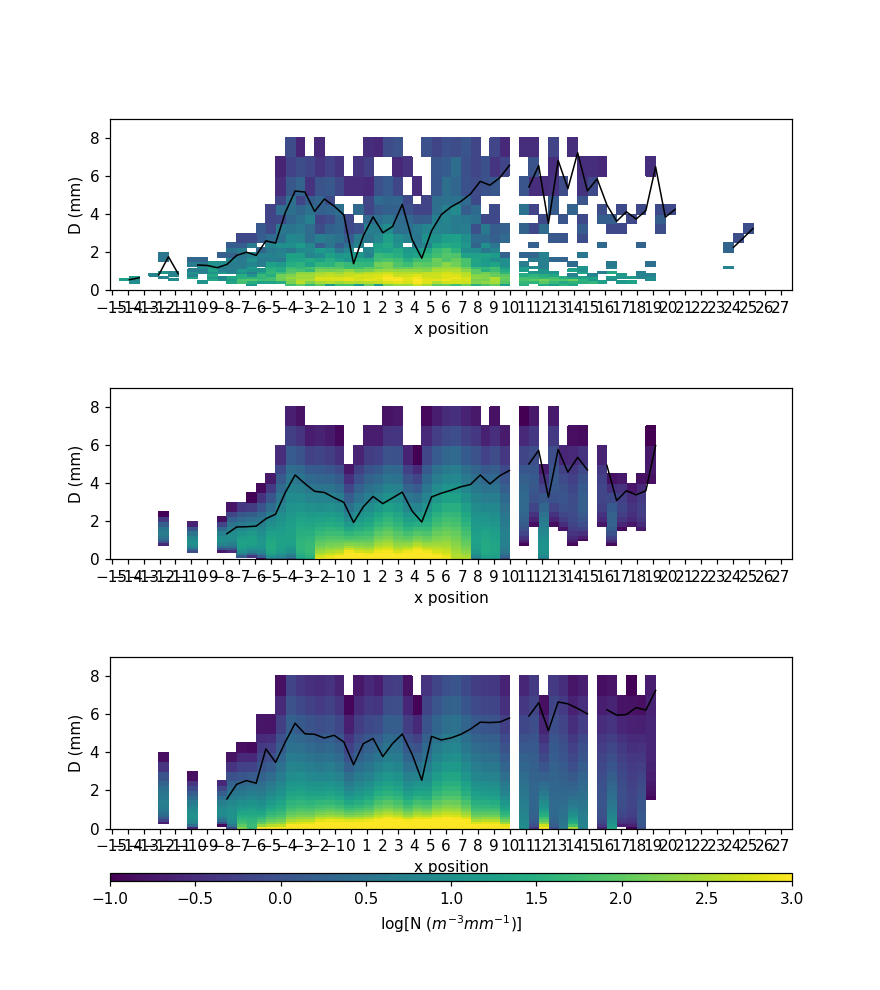

<IPython.core.display.Javascript object>


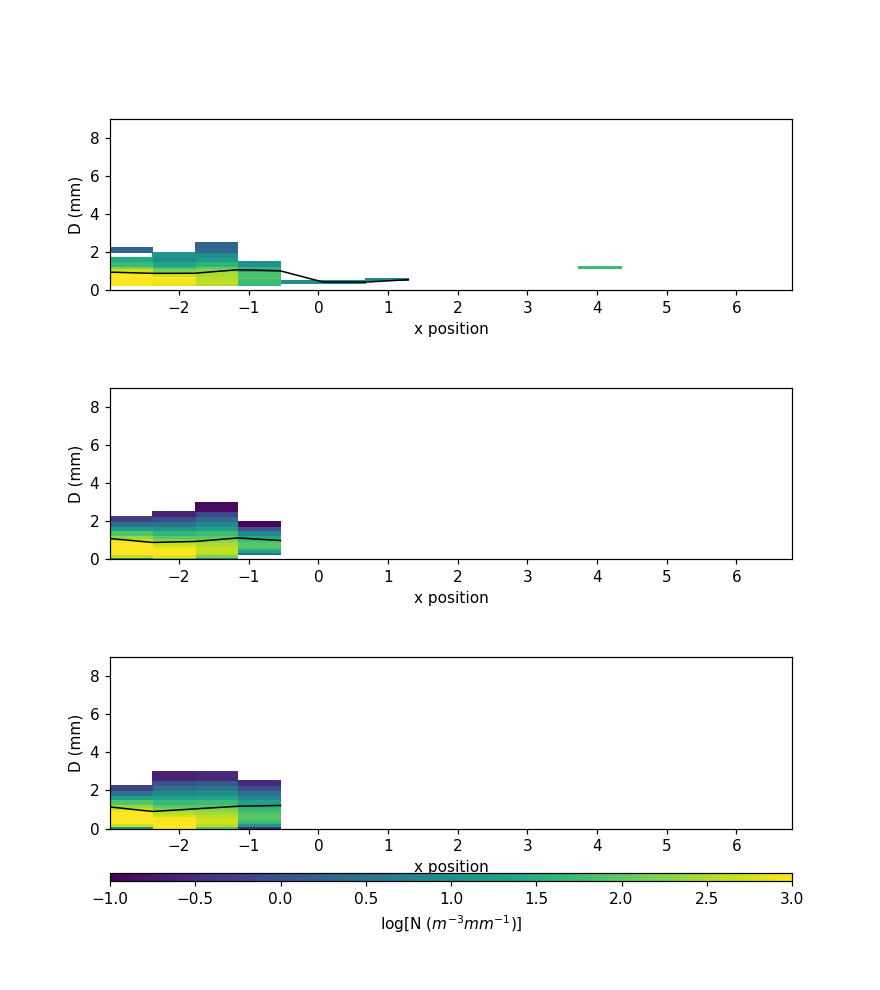

<IPython.core.display.Javascript object>


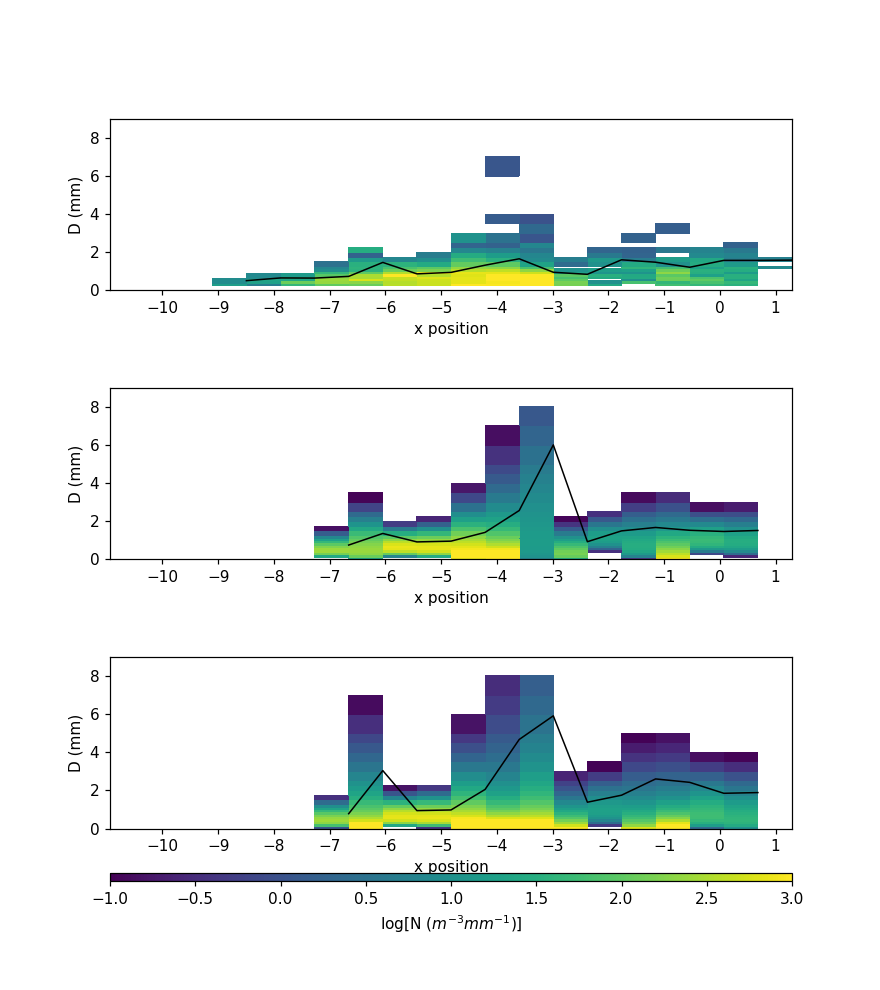

In [13]:
# Calculate and plot observed DSD transects
transect_DSD_obs_dict = sim.calc_obs_transect(casedate, dis_dict, dis_ts_model_dict, Dmax=9.0, plot_transects=True)

/Users/dawson29/pyPIPS/modules/simulator.py:1595: RuntimeWarning: divide by zero encountered in log10
  logNc_bin = np.log10(Nc_bin)
/Users/dawson29/pyPIPS/modules/simulator.py:1600: RuntimeWarning: divide by zero encountered in log10
  logNc_bin_ps = np.log10(Nc_bin_ps)
/Users/dawson29/pyPIPS/modules/disdrometer_module.py:1913: RuntimeWarning: invalid value encountered in divide
  pro = temp_M3 / np.sum(temp_M3_sum)  # Proportion of M3 in each bin
/Users/dawson29/pyPIPS/modules/disdrometer_module.py:1914: RuntimeWarning: invalid value encountered in divide
  pro_cumsum = temp_M3_cumsum / np.sum(temp_M3_sum)  # Cumulative proportion of M3 in each bin
/Users/dawson29/pyPIPS/modules/disdrometer_module.py:1920: RuntimeWarning: invalid value encountered in greater
  medindex = np.where(pro_cumsum > 0.5)[0][0]


<IPython.core.display.Javascript object>


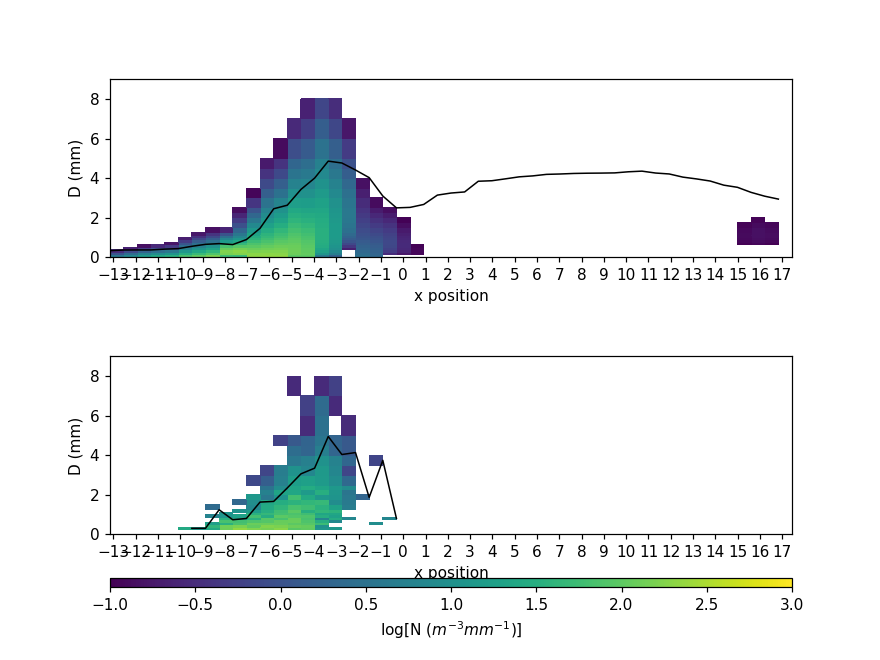

/Users/dawson29/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


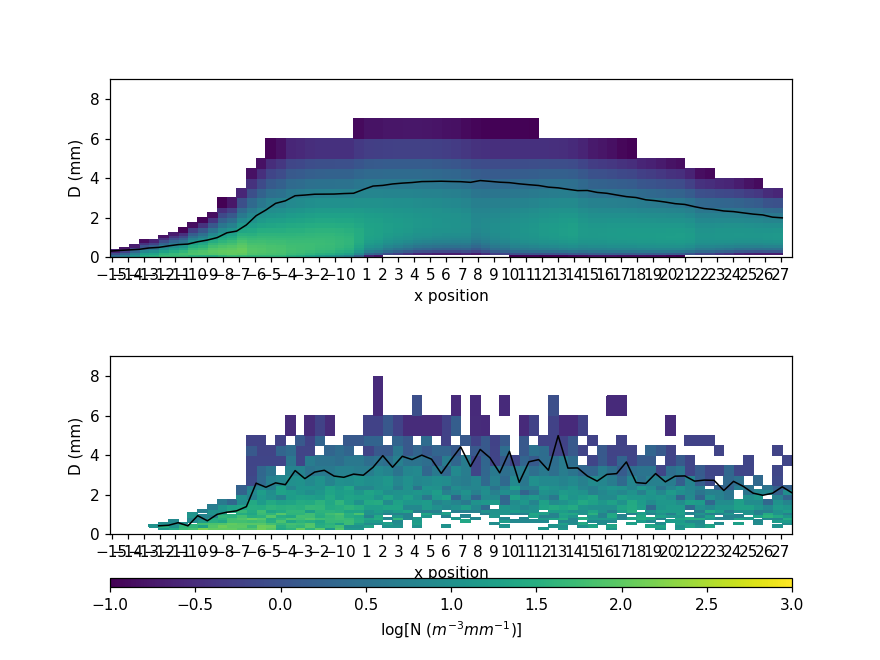

<IPython.core.display.Javascript object>


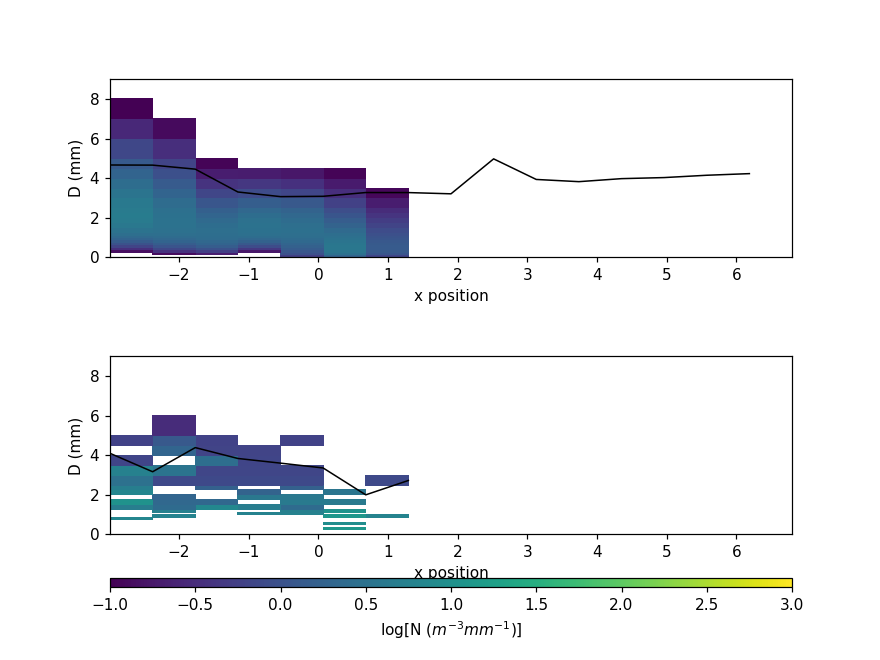

<IPython.core.display.Javascript object>


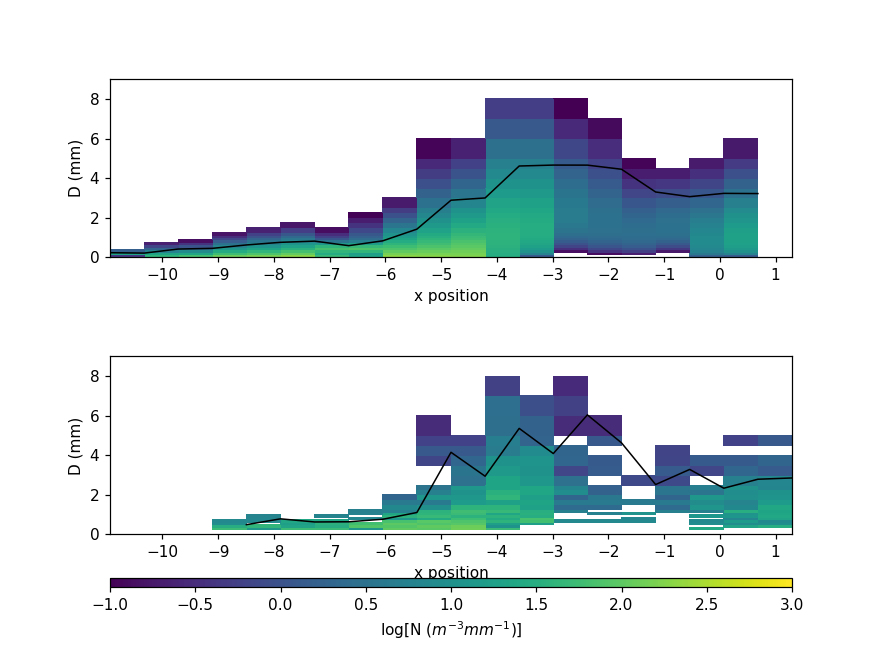

In [14]:
# Calculate and plot model DSD transects
transect_DSD_dict = sim.interp_model_to_transect(casedate, dis_dict, model_dict, dis_ts_model_dict,
                                                 sampling_interval=60., add_hail=False, 
                                                 use_bins_for_interp=True, use_Parsivel_simulator=True, 
                                                 Dmax=9.0, plot_transects=True)

<IPython.core.display.Javascript object>


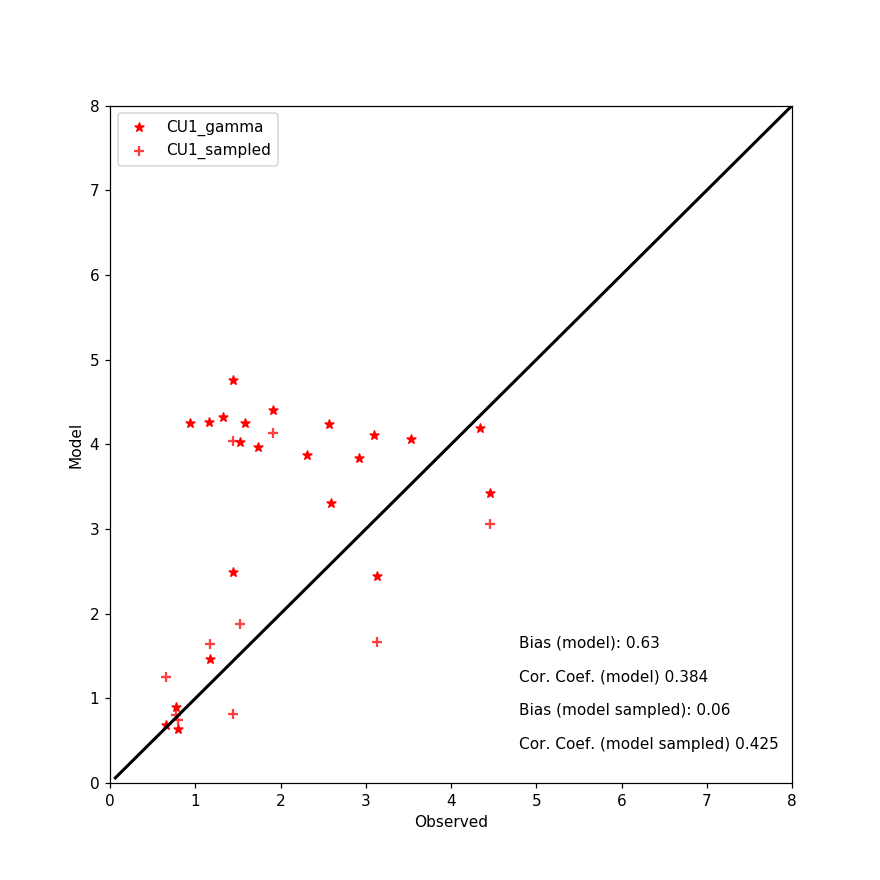

<IPython.core.display.Javascript object>


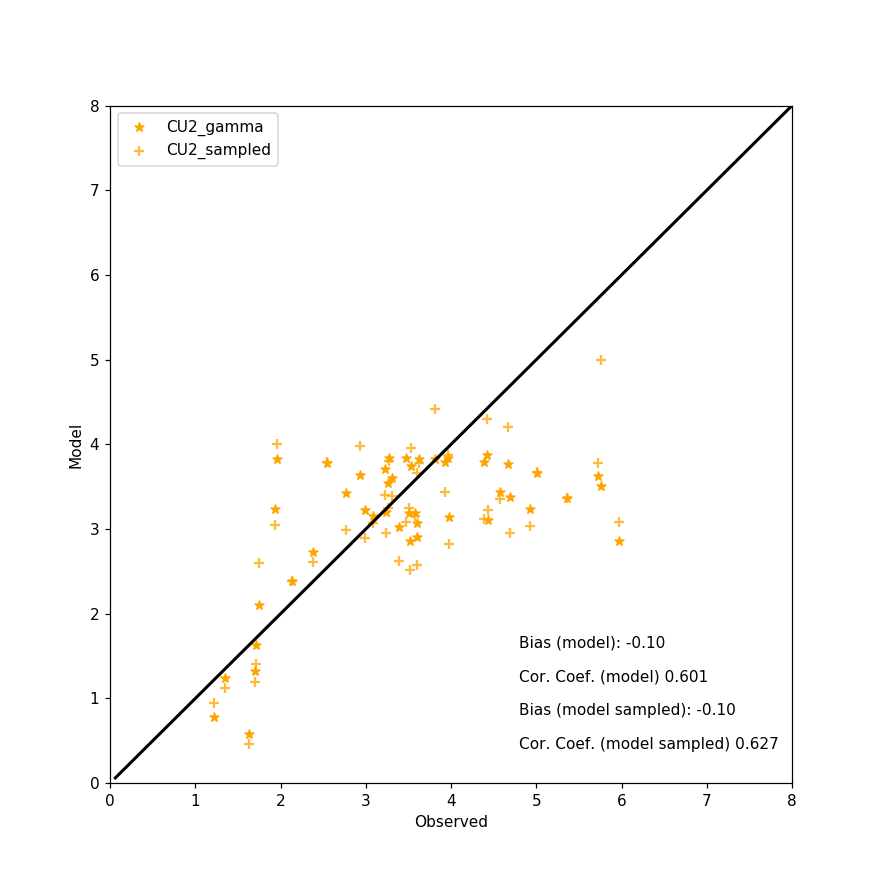

<IPython.core.display.Javascript object>


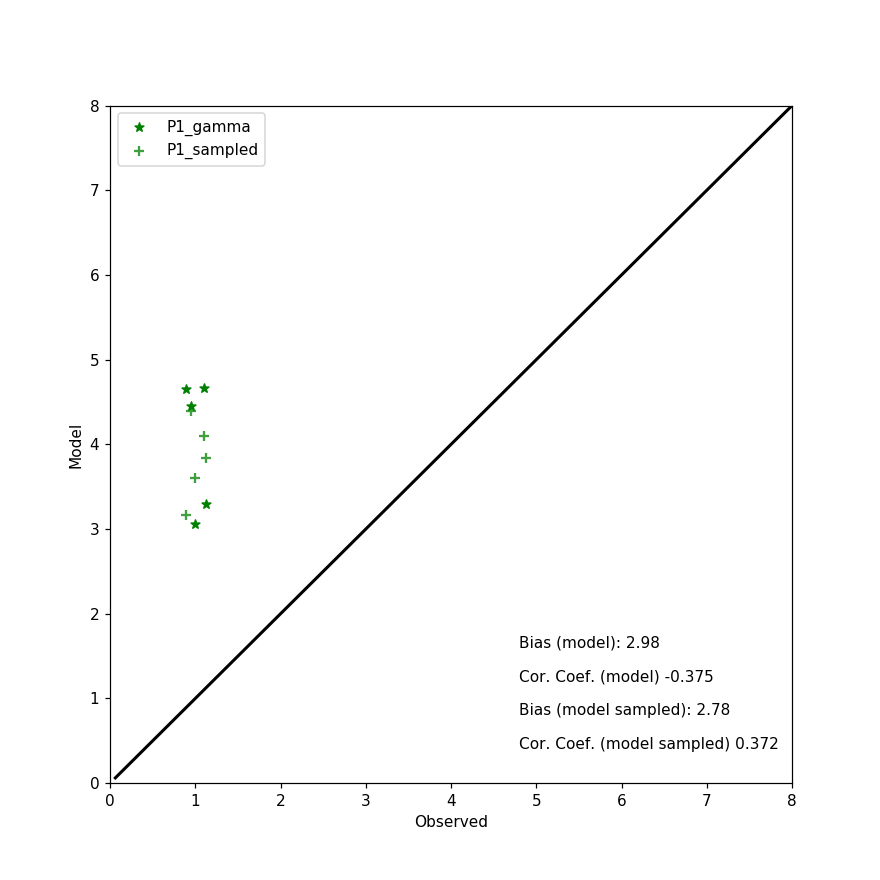

<IPython.core.display.Javascript object>


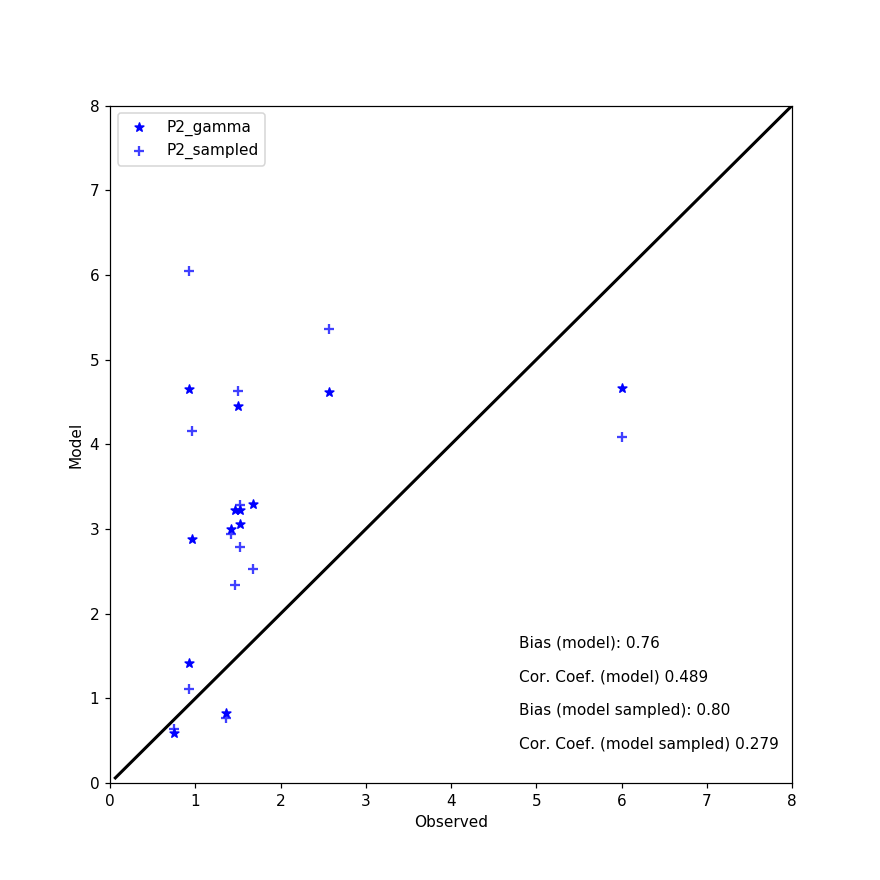

In [15]:
# Make some one-to-one plots of D0 (model) vs. D0 (disdrometer)

yvals = sim.D*1000.
xvals = sim.D*1000.
color_list = ['r', 'orange', 'g', 'b']

D0r_mod = transect_DSD_dict['D0r']
D0r_mod_sampled = transect_DSD_dict['D0r_ps']

D0r_obs = transect_DSD_obs_dict['D0r_obs']
D0r_obs_gam = transect_DSD_obs_dict['D0r_gam']

for d, dis_name in enumerate(dis_dict[casedate]['dis_names']):
    obs = D0r_obs_gam[d]*1000.
    mod = D0r_mod[d]*1000.
    mod_sampled = D0r_mod_sampled[d]*1000.
    bias_mod = ((np.nansum(mod-obs))/np.nansum(obs))
    bias_mod_sampled = ((np.nansum(mod_sampled-obs))/np.nansum(obs))
    cc_mod = pd.DataFrame({'obs': obs, 'mod': mod}).corr().iloc[0, 1]
    cc_mod_sampled = pd.DataFrame({'obs': obs, 'mod': mod_sampled}).corr().iloc[0, 1]
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    plt.scatter(obs, mod, c=color_list[d], marker='*', label=dis_name+'_gamma')
    plt.scatter(obs, mod_sampled, c=color_list[d], marker='+', alpha=0.75, label=dis_name+'_sampled')
    ax.plot(xvals, yvals, lw=2, color='k')
    ax.set_xlim(0.0, 8.0)
    ax.set_ylim(0.0, 8.0)
    ax.set_xlabel('Observed')
    ax.set_ylabel('Model')
    ax.text(0.6, 0.20, 'Bias (model): {:2.2f}'.format(bias_mod), transform=ax.transAxes)
    ax.text(0.6, 0.15, 'Cor. Coef. (model) {:2.3f}'.format(cc_mod), transform=ax.transAxes)
    ax.text(0.6, 0.10, 'Bias (model sampled): {:2.2f}'.format(bias_mod_sampled), transform=ax.transAxes)
    ax.text(0.6, 0.05, 'Cor. Coef. (model sampled) {:2.3f}'.format(cc_mod_sampled), transform=ax.transAxes)
    plt.legend(loc='upper left')

[ 17437.66126632  16825.86228599  16214.06330565  15602.26432532
  14990.46534498  14378.66636465  13766.86738431  13155.06840398
  12543.26942364  11931.47044331  11319.67146297  10707.87248264
  10096.0735023    9484.27452197   8872.47554163   8260.6765613
   7648.87758096   7037.07860063   6425.27962029   5813.48063996
   5201.68165962   4589.88267929   3978.08369895   3366.28471862
   2754.48573828   2142.68675795   1530.88777761    919.08879728
    307.28981694   -304.50916339   -916.30814373  -1528.10712406
  -2139.9061044   -2751.70508473  -3363.50406507  -3975.3030454
  -4587.10202574  -5198.90100608  -5810.69998641  -6422.49896675
  -7034.29794708  -7646.09692742  -8257.89590775  -8869.69488809
  -9481.49386842 -10093.29284876 -10705.09182909 -11316.89080943
 -11928.68978976 -12540.4887701  -13152.28775043]


/Users/dawson29/pyPIPS/modules/disdrometer_module.py:1894: RuntimeWarning: divide by zero encountered in log10
  dBZ = 10. * np.log10(Zh)
/Users/dawson29/pyPIPS/modules/disdrometer_module.py:1895: RuntimeWarning: invalid value encountered in divide
  temp = Zh / Zv
/Users/dawson29/pyPIPS/modules/disdrometer_module.py:1899: RuntimeWarning: invalid value encountered in divide
  rhv = np.where(Zh != Zv, Zhv / (np.sqrt(temp)), 0.0)


<IPython.core.display.Javascript object>


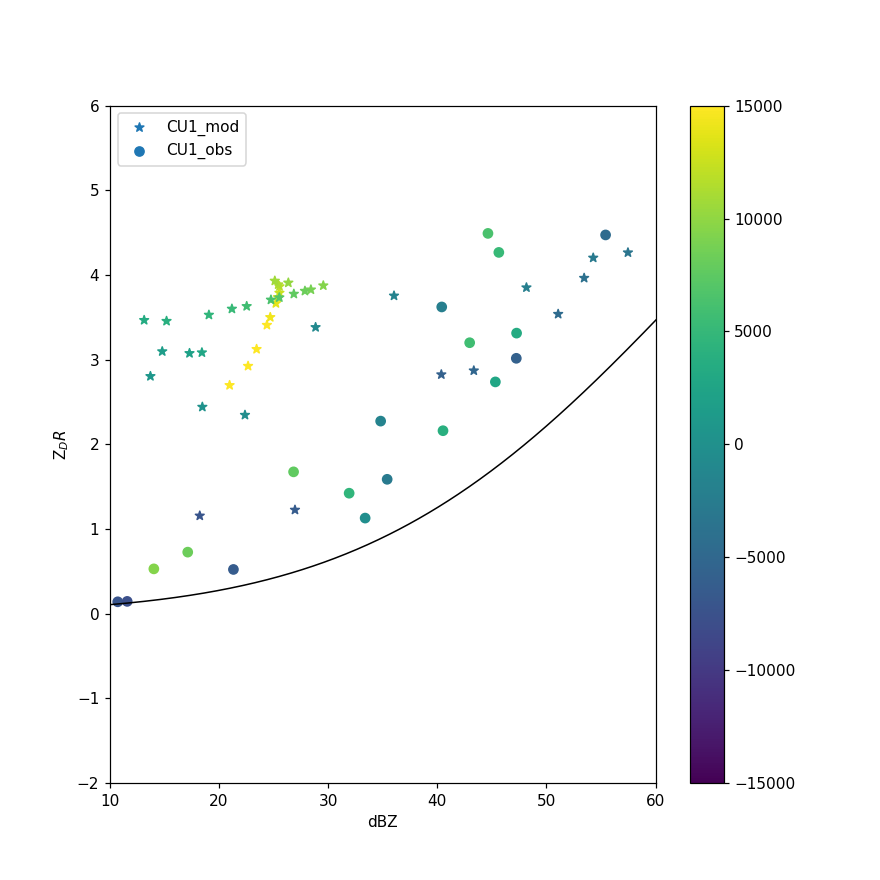

[ 27716.47538397  27104.67640364  26492.8774233   25881.07844297
  25269.27946263  24657.4804823   24045.68150196  23433.88252163
  22822.08354129  22210.28456096  21598.48558062  20986.68660029
  20374.88761995  19763.08863962  19151.28965928  18539.49067895
  17927.69169861  17315.89271828  16704.09373794  16092.29475761
  15480.49577727  14868.69679694  14256.8978166   13645.09883627
  13033.29985593  12421.5008756   11809.70189526  11197.90291493
  10586.10393459   9974.30495426   9362.50597392   8750.70699359
   8138.90801325   7527.10903292   6915.31005258   6303.51107225
   5691.71209191   5079.91311157   4468.11413124   3856.3151509
   3244.51617057   2632.71719023   2020.9182099    1409.11922956
    797.32024923    185.52126889   -426.27771144  -1038.07669178
  -1649.87567211  -2261.67465245  -2873.47363278  -3485.27261312
  -4097.07159345  -4708.87057379  -5320.66955412  -5932.46853446
  -6544.26751479  -7156.06649513  -7767.86547546  -8379.6644558
  -8991.46343613  -9603.262

<IPython.core.display.Javascript object>


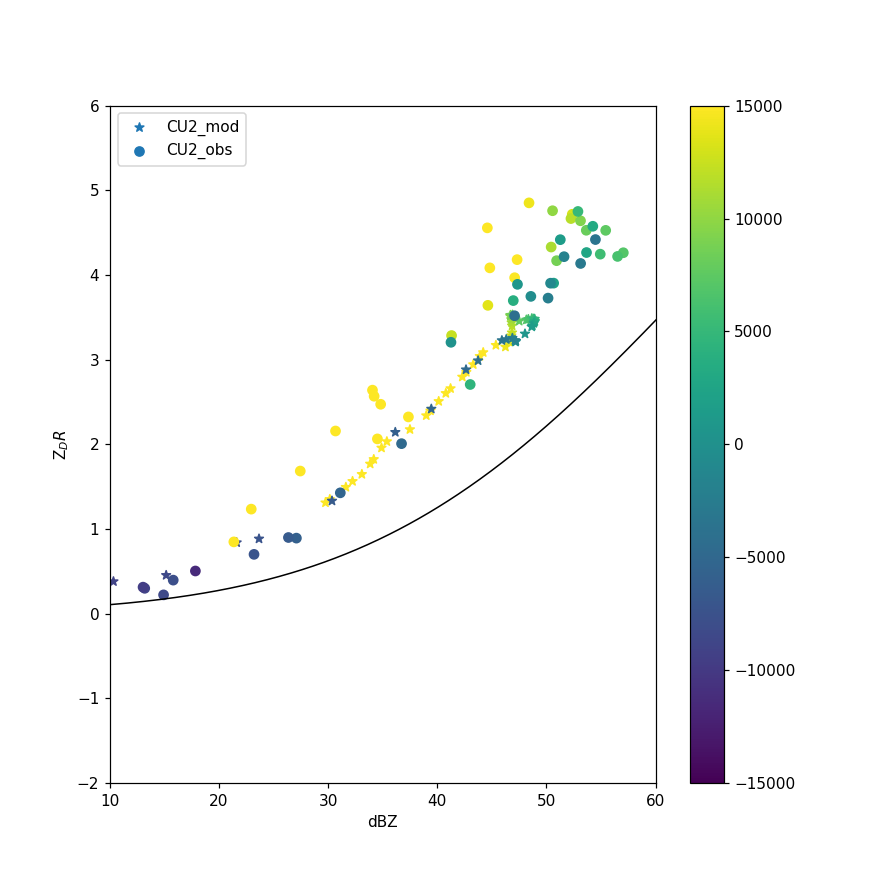

[ 6797.25935736  6185.46037703  5573.66139669  4961.86241636
  4350.06343602  3738.26445569  3126.46547535  2514.66649502
  1902.86751468  1291.06853435   679.26955401    67.47057368
  -544.32840666 -1156.12738699 -1767.92636733 -2379.72534766
 -2991.524328  ]


<IPython.core.display.Javascript object>


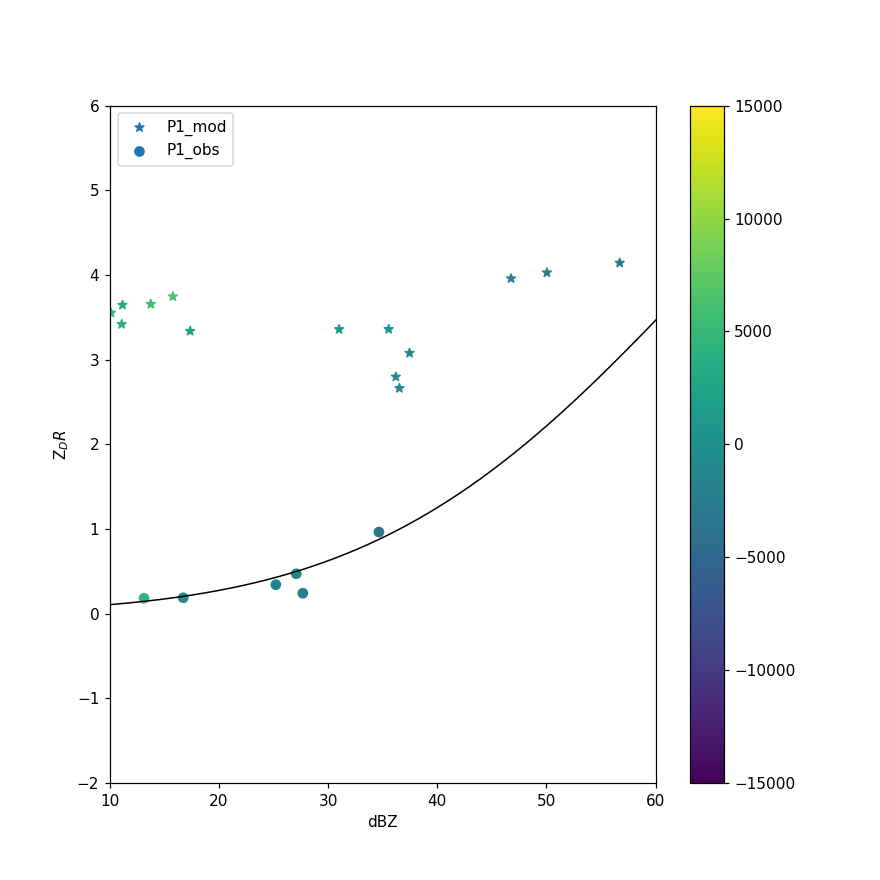

[  1295.33867444    683.5396941      71.74071377   -540.05826657
  -1151.8572469   -1763.65622724  -2375.45520757  -2987.25418791
  -3599.05316824  -4210.85214858  -4822.65112891  -5434.45010925
  -6046.24908958  -6658.04806992  -7269.84705025  -7881.64603059
  -8493.44501092  -9105.24399126  -9717.0429716  -10328.84195193
 -10940.64093227]


<IPython.core.display.Javascript object>


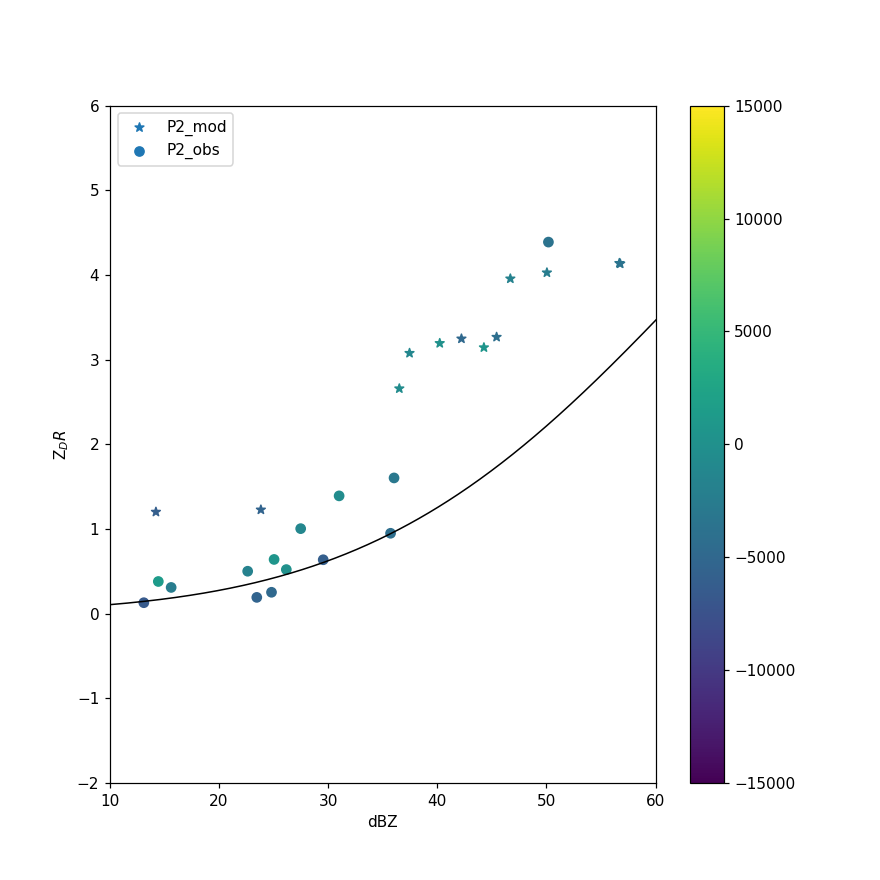

In [16]:
# Calculate dual-pol variables for both the model and observations and make scatterplots of Z vs. ZDR
# Z, ZDR relation from Cao et al. (2008)
Zh_Cao = np.arange(10, 61, 0.1)
Zdr_Cao = 10**((-2.6857 * 10**-4 * Zh_Cao**2) + 0.04892 * Zh_Cao - 1.4287)

scattfile = '../tmatrix/S-band/SCTT_RAIN_fw100.dat'
wavelength = 10.7 # mm
Dmax = 9.0
Dmax_index = sim.get_Dmax_index(Dmax)
color_list = ['r', 'orange', 'g', 'b']
ND_mod = transect_DSD_dict['ND']
ND_obs = transect_DSD_obs_dict['ND']



for d, dis_name in enumerate(dis_dict[casedate]['dis_names']):
    dualpol_mod = dis.calpolrain(wavelength, scattfile, ND_mod[d].T, dis.bin_width[:Dmax_index])
    dualpol_obs = dis.calpolrain(wavelength, scattfile, ND_obs[d].T, dis.bin_width[:Dmax_index])
    sample_xlocs = np.array([xylocs[0] for xylocs in dis_ts_model_dict['dis_ts_xyslocs'][d]])
    print sample_xlocs
    sample_ylocs = np.array([xylocs[1] for xylocs in dis_ts_model_dict['dis_ts_xyslocs'][d]])
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    sc = plt.scatter(dualpol_mod['dBZ'], dualpol_mod['ZDR'], c=sample_xlocs, marker='*', label=dis_name+'_mod',
                     vmin=-15000., vmax=15000.)
    plt.scatter(dualpol_obs['dBZ'], dualpol_obs['ZDR'], c=sample_xlocs, marker='o', label=dis_name+'_obs', vmin=-15000., vmax=15000.)
    plt.plot(Zh_Cao, Zdr_Cao, c='k', ls='-', lw=1.0)
    plt.colorbar(sc)
    ax.set_xlabel('dBZ')
    ax.set_ylabel(r'Z$_DR$')
    ax.set_xlim(10.0, 60.0)
    ax.set_ylim(-2.0, 6.0)
    plt.legend(loc='upper left')